# MegaMapper

In [1]:
# import all revelant packages
from headers import *

In [11]:
SO = np.zeros((15,15))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= 2.10732e-9
tmp[:,5] *= 2.10732e-9

SO = tmp.copy()

In [12]:
np.sqrt(np.linalg.inv(SO)[1,1])

0.010658491644357176

In [10]:
np.sqrt(np.linalg.inv(SO)[1,1])/0.0568

0.1876495007808463

## Setting up the cosmology

In [3]:
# Using halofit to estimate the nonlinear matter power spectrum
megaParams = {
          'output': 'mPk',
          'P_k_max_h/Mpc': 40.,
          'non linear':'halofit', 
          'z_pk': '0.0,10',
          'A_s': 2.10732e-9,
          'n_s': 0.96824,
          'alpha_s': 0.,
          'h': 0.6770,
          'N_ur': 1.0196,
          'N_ncdm': 2,
          'm_ncdm': '0.01,0.05',
          'tau_reio': 0.0568,
          'omega_b': 0.02247,
          'omega_cdm': 0.11923,
          'Omega_k': 0.}

megaCosmo = Class()
megaCosmo.set(megaParams)
megaCosmo.compute()

## Creating the experiment
MegaMapper will observe LBG galaxies, so I set LBG=True. This tells fishlss to use the LBG bias and noise models. For now I'm ignoring photo-z errors, so I set $\sigma_z=0$.

In [3]:
megaMapper = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True)

## Defining the forecast
We will use velocileptors to calculate the nonlinear power spectrum and to model RSD. We choose $k_\text{min}=5\times 10^{-4} {\rm h Mpc^{-1}}$ to be small enough to avoid edge effects in our derivates.

In [ ]:
megaCast = fisherForecast(experiment=megaMapper,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                          khmax=1.,Nk=1000,Nmu=200,velocileptors=True,name='MegaMapper')

Here we choose the parameters to calculate the derivatives for.

In [5]:
megaCast.marg_params = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','fEDE','b','N',\
                                 'm_ncdm','N_ur','A_lin','alpha_s','Hz','Da','b2',\
                                 'bs','alpha0','alpha2','alpha4','sn2','Omega_k'])

## Calculate the derivatives

In [6]:
megaCast.compute_derivatives()

## Check that the derivatives are reasonable

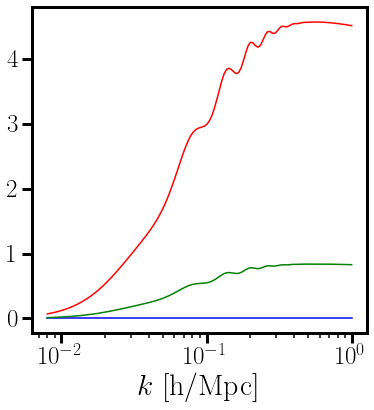

alpha2_275.txt


<Figure size 432x288 with 0 Axes>

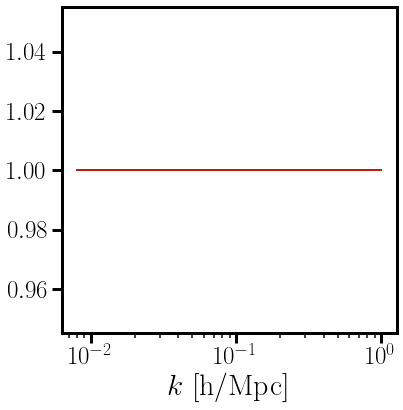

N_325.txt


<Figure size 432x288 with 0 Axes>

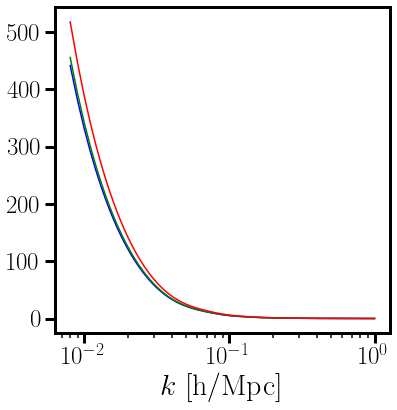

f_NL_275.txt


<Figure size 432x288 with 0 Axes>

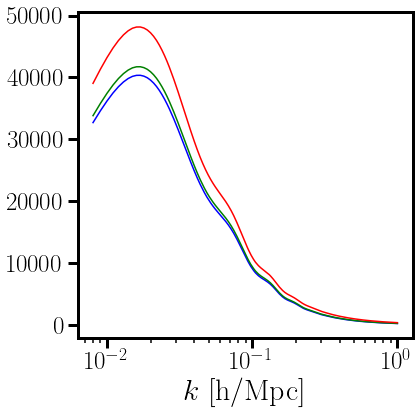

A_lin_1_425.txt


<Figure size 432x288 with 0 Axes>

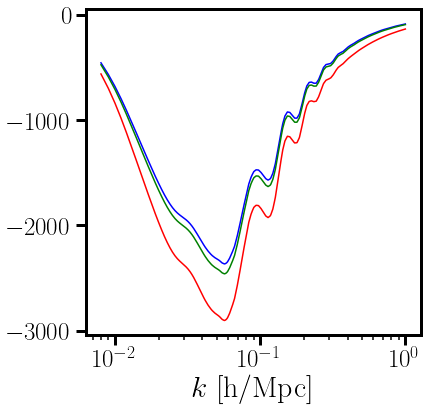

fEDE_4921_375.txt


<Figure size 432x288 with 0 Axes>

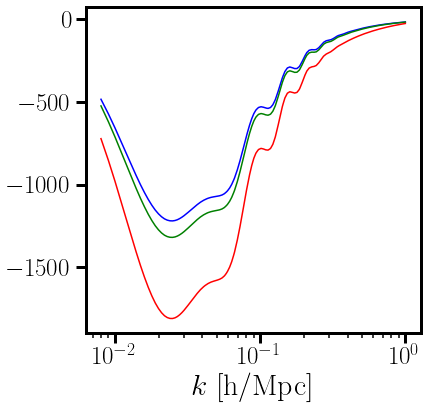

N_ur_225.txt


<Figure size 432x288 with 0 Axes>

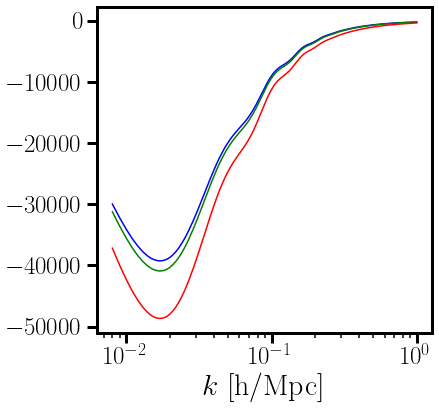

fEDE_1500_375.txt


<Figure size 432x288 with 0 Axes>

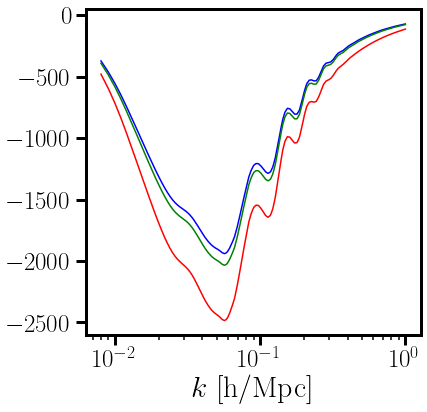

fEDE_4921_325.txt


<Figure size 432x288 with 0 Axes>

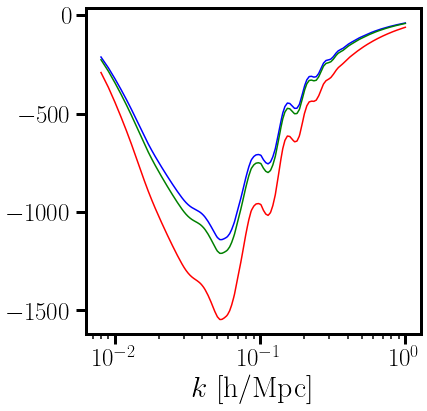

fEDE_5184_275.txt


<Figure size 432x288 with 0 Axes>

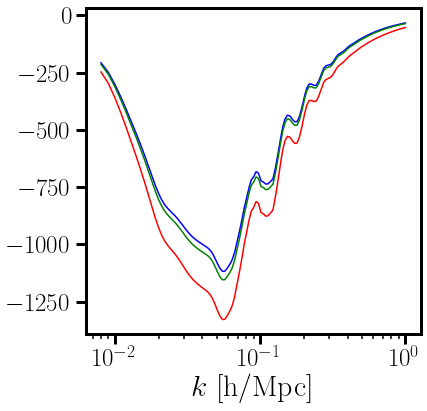

fEDE_5710_425.txt


<Figure size 432x288 with 0 Axes>

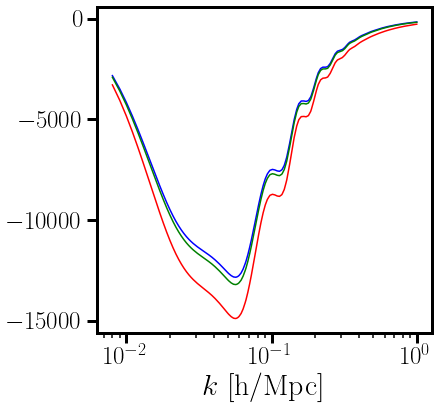

fEDE_3868_475.txt


<Figure size 432x288 with 0 Axes>

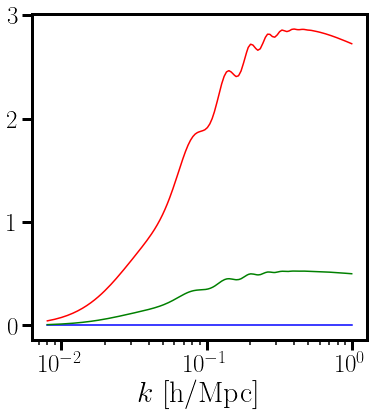

alpha2_375.txt


<Figure size 432x288 with 0 Axes>

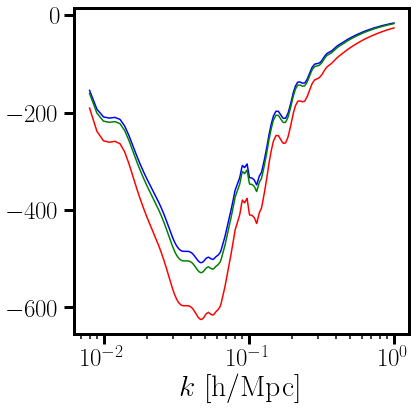

fEDE_6236_375.txt


<Figure size 432x288 with 0 Axes>

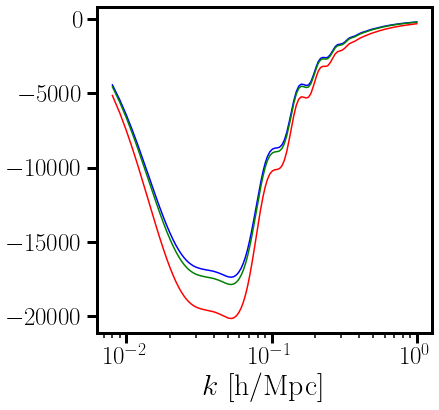

fEDE_3605_475.txt


<Figure size 432x288 with 0 Axes>

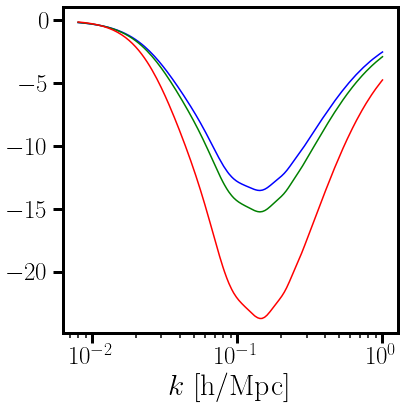

bs_275.txt


<Figure size 432x288 with 0 Axes>

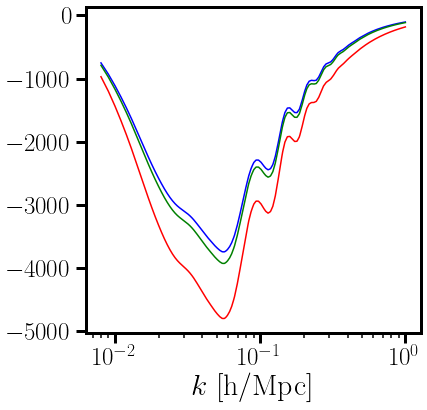

fEDE_4394_325.txt


<Figure size 432x288 with 0 Axes>

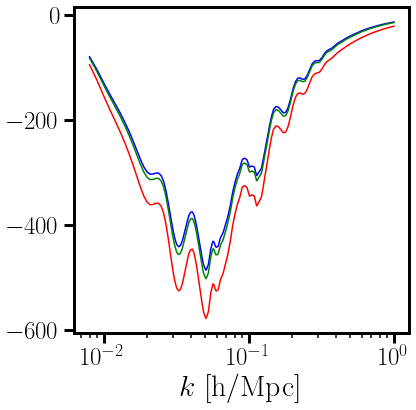

fEDE_6500_425.txt


<Figure size 432x288 with 0 Axes>

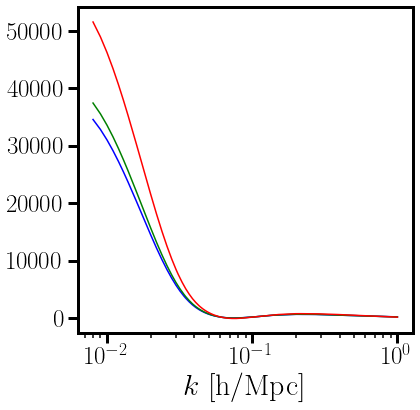

alpha_s_225.txt


<Figure size 432x288 with 0 Axes>

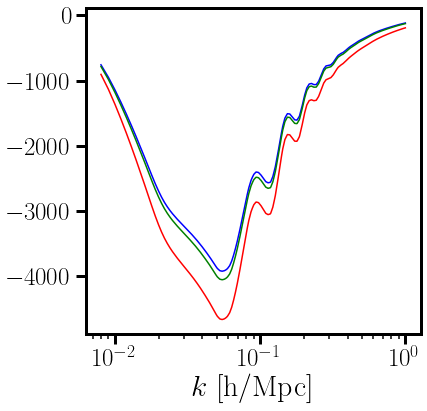

fEDE_4657_425.txt


<Figure size 432x288 with 0 Axes>

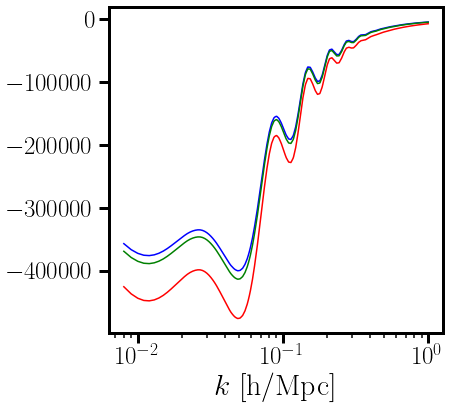

omega_b_425.txt


<Figure size 432x288 with 0 Axes>

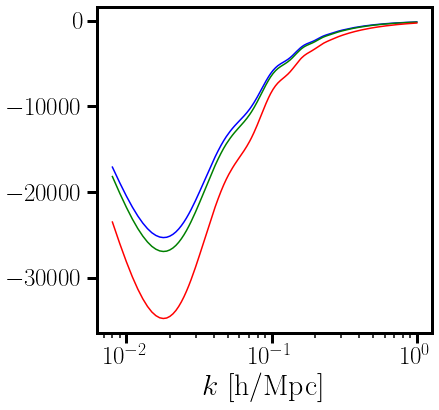

fEDE_2026_275.txt


<Figure size 432x288 with 0 Axes>

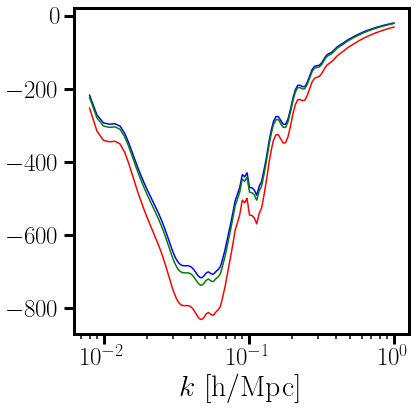

fEDE_6236_475.txt


<Figure size 432x288 with 0 Axes>

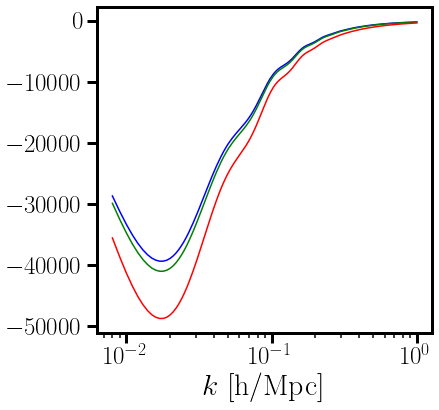

fEDE_1763_375.txt


<Figure size 432x288 with 0 Axes>

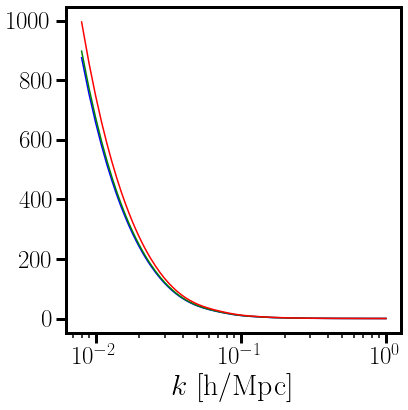

f_NL_325.txt


<Figure size 432x288 with 0 Axes>

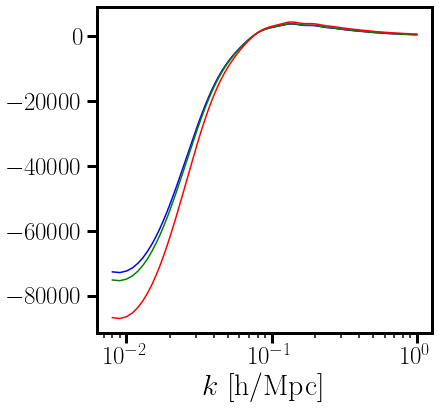

n_s_425.txt


<Figure size 432x288 with 0 Axes>

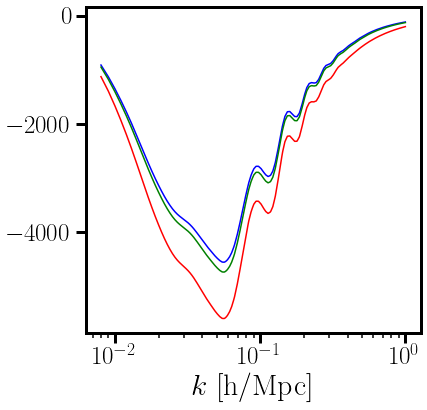

fEDE_4394_375.txt


<Figure size 432x288 with 0 Axes>

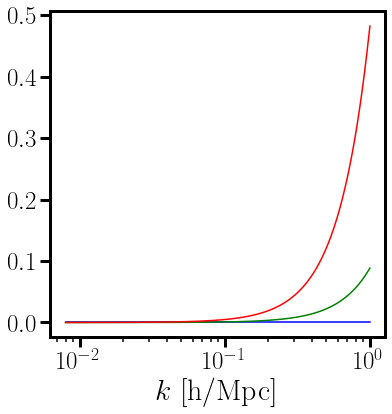

sn2_275.txt


<Figure size 432x288 with 0 Axes>

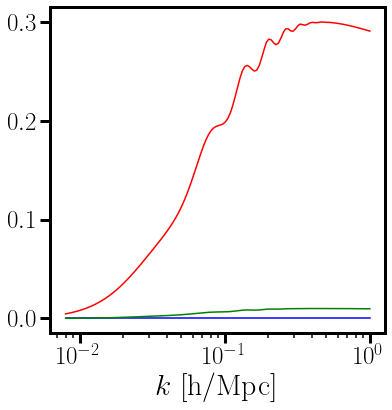

alpha4_325.txt


<Figure size 432x288 with 0 Axes>

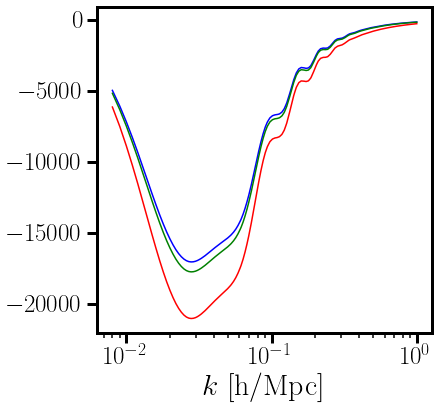

fEDE_3342_375.txt


<Figure size 432x288 with 0 Axes>

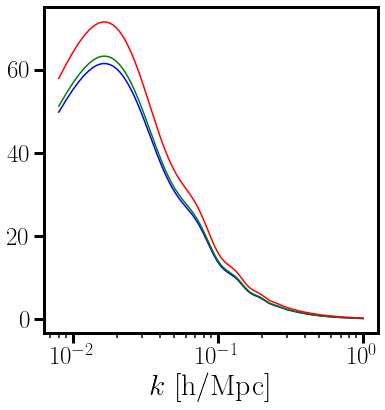

Hz_475.txt


<Figure size 432x288 with 0 Axes>

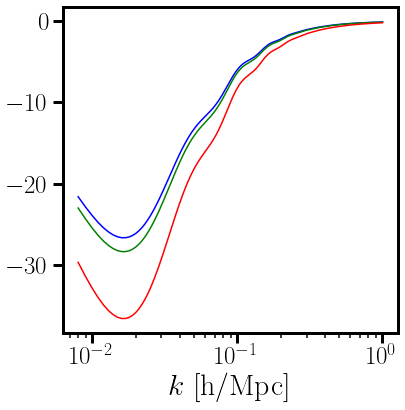

Da_275.txt


<Figure size 432x288 with 0 Axes>

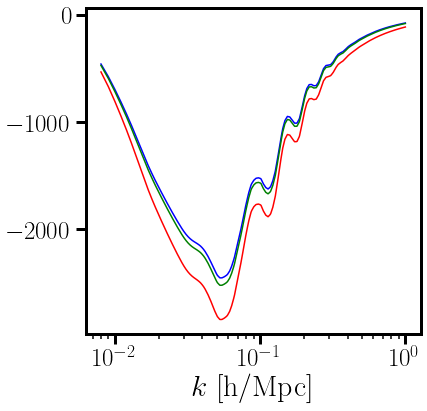

fEDE_5184_475.txt


<Figure size 432x288 with 0 Axes>

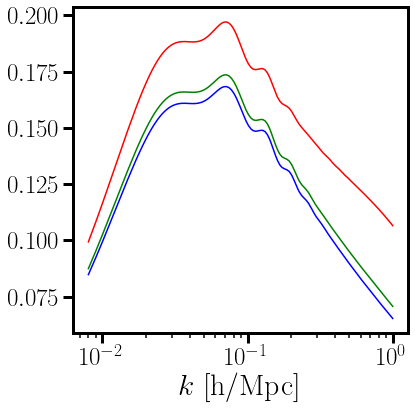

f_NL_eq_275.txt


<Figure size 432x288 with 0 Axes>

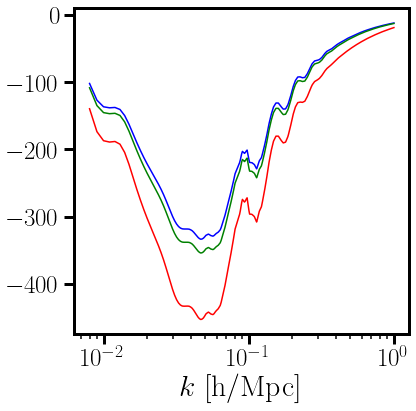

fEDE_6236_275.txt


<Figure size 432x288 with 0 Axes>

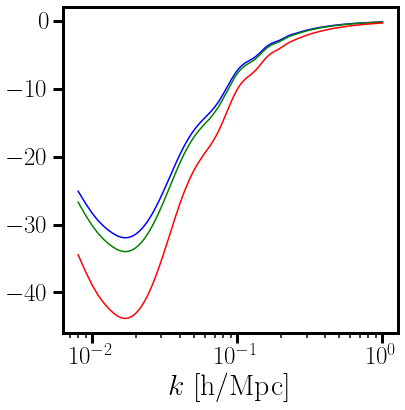

tau_reio_275.txt


<Figure size 432x288 with 0 Axes>

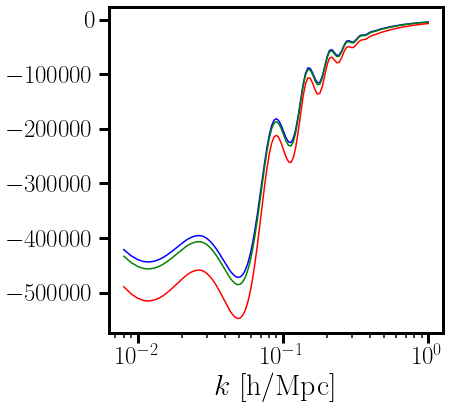

omega_b_475.txt


<Figure size 432x288 with 0 Axes>

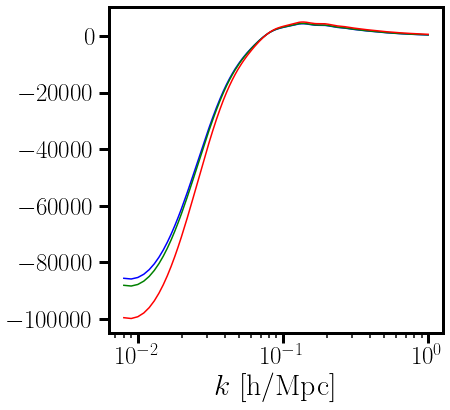

n_s_475.txt


<Figure size 432x288 with 0 Axes>

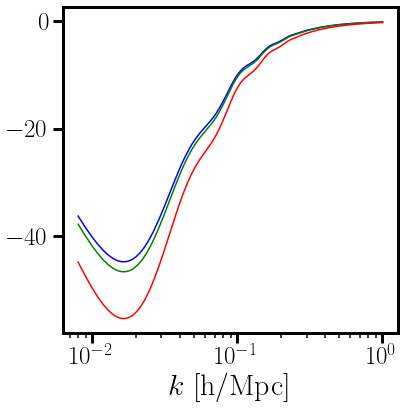

Da_375.txt


<Figure size 432x288 with 0 Axes>

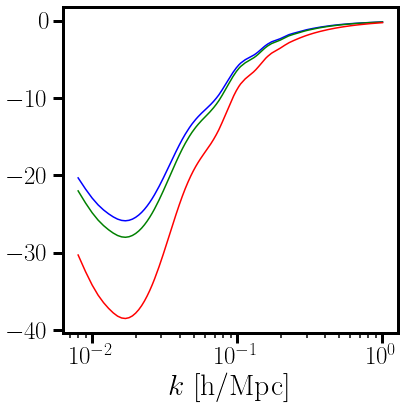

tau_reio_225.txt


<Figure size 432x288 with 0 Axes>

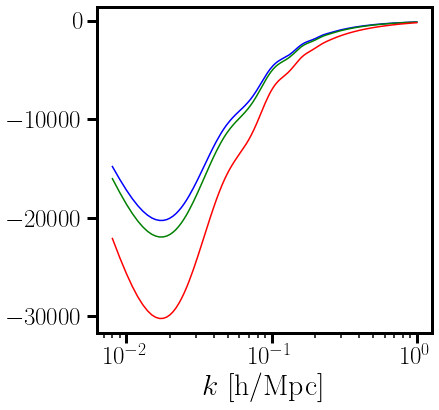

fEDE_1763_225.txt


<Figure size 432x288 with 0 Axes>

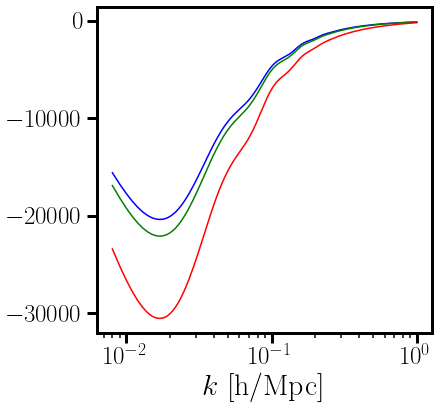

fEDE_1500_225.txt


<Figure size 432x288 with 0 Axes>

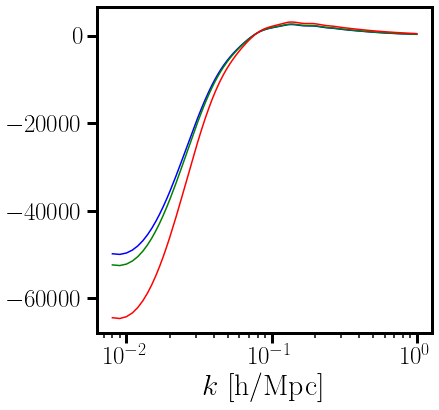

n_s_325.txt


<Figure size 432x288 with 0 Axes>

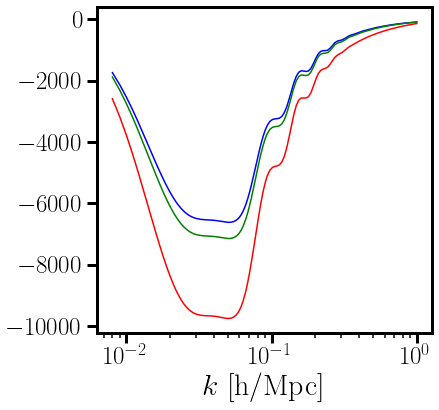

fEDE_3562_225.txt


<Figure size 432x288 with 0 Axes>

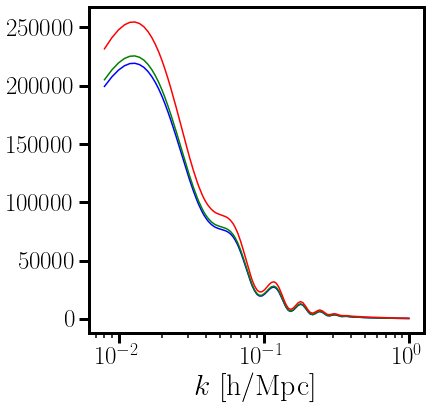

h_475.txt


<Figure size 432x288 with 0 Axes>

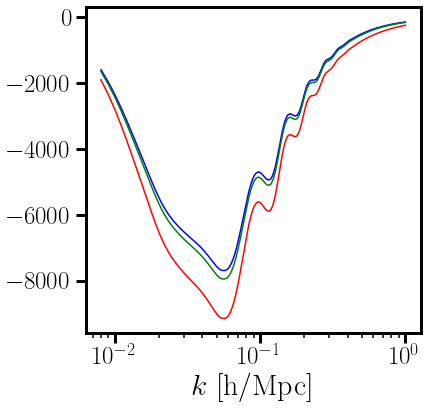

fEDE_4131_425.txt


<Figure size 432x288 with 0 Axes>

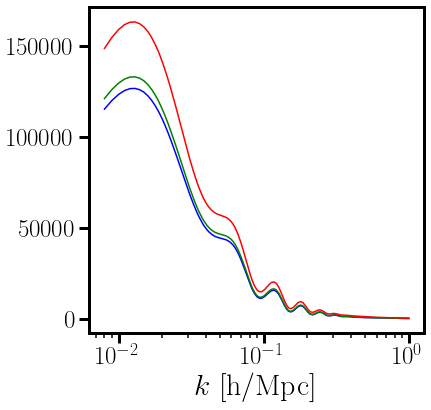

h_325.txt


<Figure size 432x288 with 0 Axes>

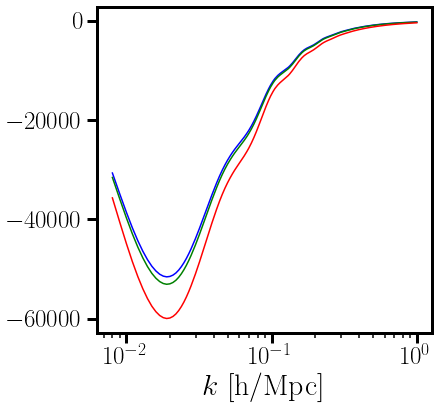

fEDE_2289_475.txt


<Figure size 432x288 with 0 Axes>

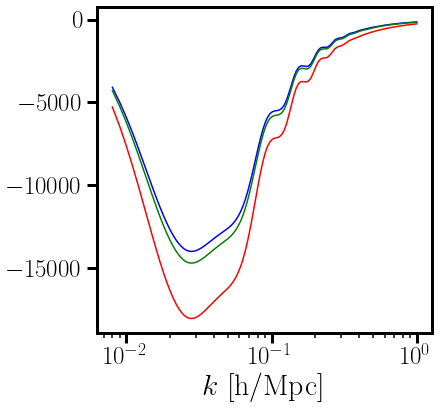

fEDE_3342_325.txt


<Figure size 432x288 with 0 Axes>

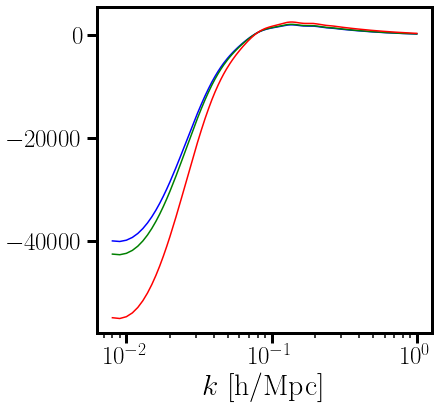

n_s_275.txt


<Figure size 432x288 with 0 Axes>

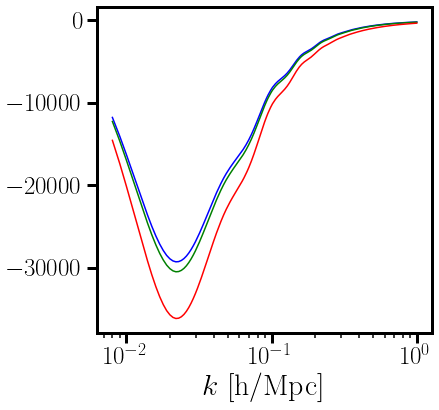

fEDE_2815_375.txt


<Figure size 432x288 with 0 Axes>

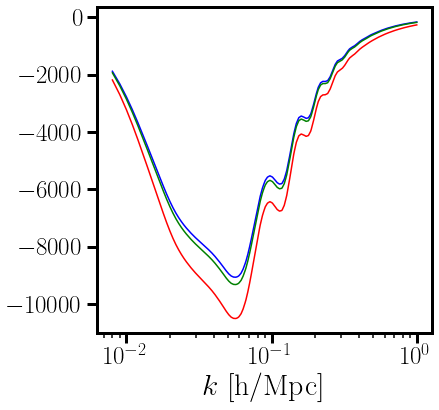

fEDE_4131_475.txt


<Figure size 432x288 with 0 Axes>

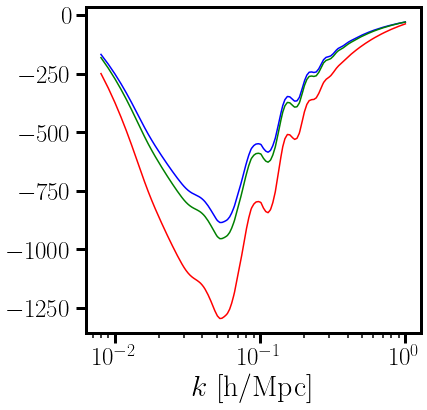

fEDE_5184_225.txt


<Figure size 432x288 with 0 Axes>

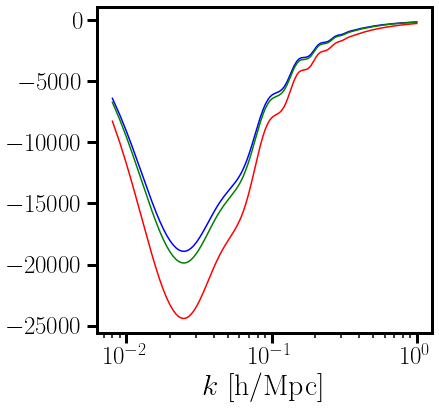

fEDE_3078_325.txt


<Figure size 432x288 with 0 Axes>

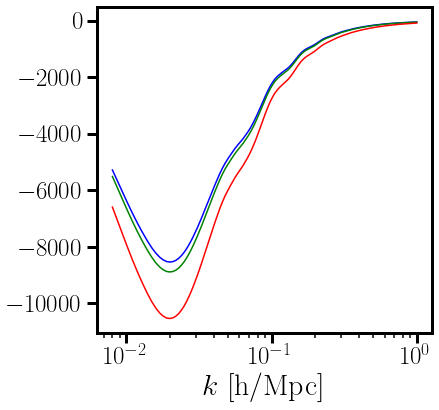

m_ncdm_425.txt


<Figure size 432x288 with 0 Axes>

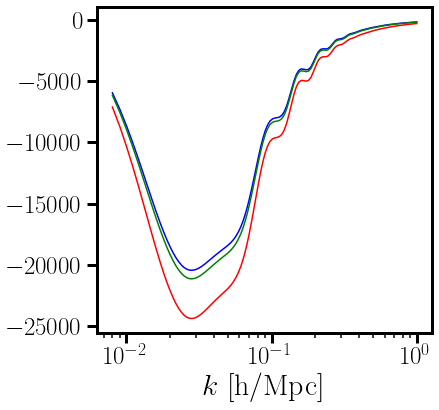

fEDE_3342_425.txt


<Figure size 432x288 with 0 Axes>

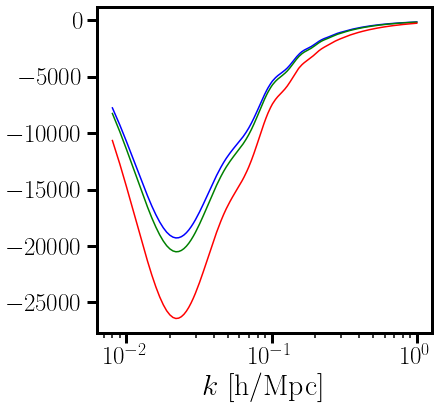

fEDE_2815_275.txt


<Figure size 432x288 with 0 Axes>

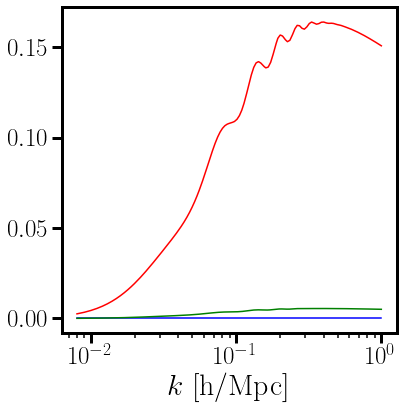

alpha4_475.txt


<Figure size 432x288 with 0 Axes>

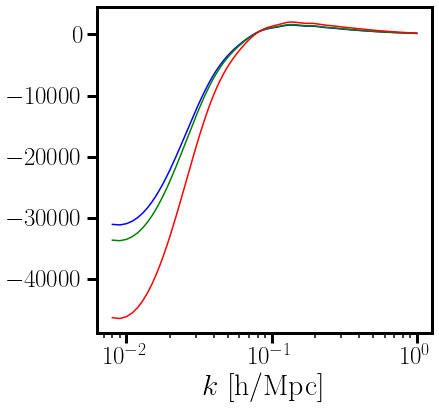

n_s_225.txt


<Figure size 432x288 with 0 Axes>

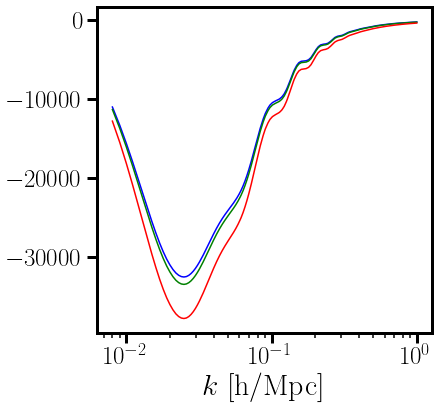

fEDE_3078_475.txt


<Figure size 432x288 with 0 Axes>

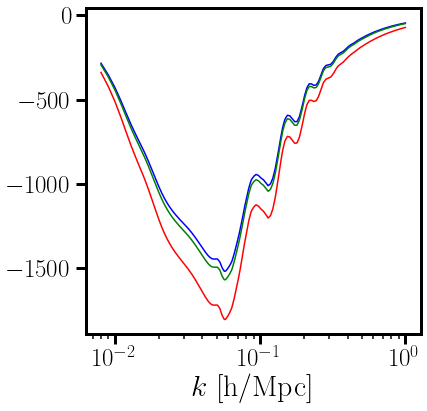

fEDE_5447_425.txt


<Figure size 432x288 with 0 Axes>

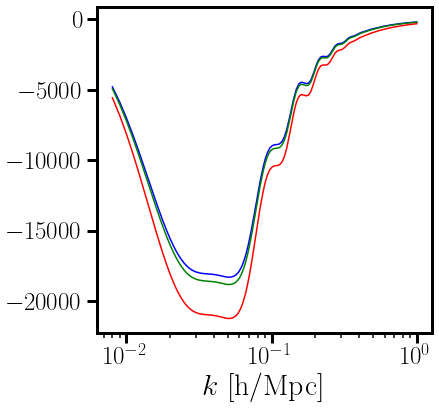

fEDE_3562_475.txt


<Figure size 432x288 with 0 Axes>

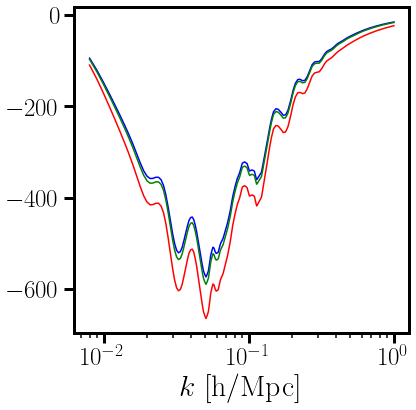

fEDE_6500_475.txt


<Figure size 432x288 with 0 Axes>

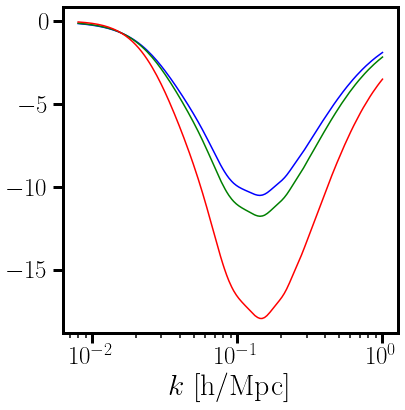

bs_325.txt


<Figure size 432x288 with 0 Axes>

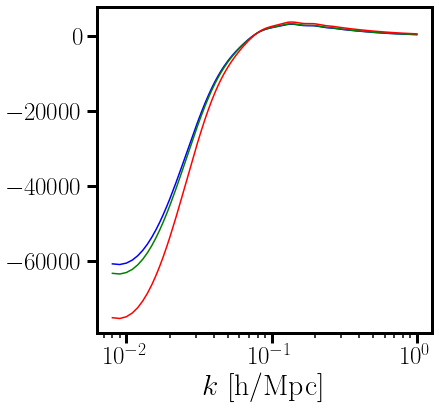

n_s_375.txt


<Figure size 432x288 with 0 Axes>

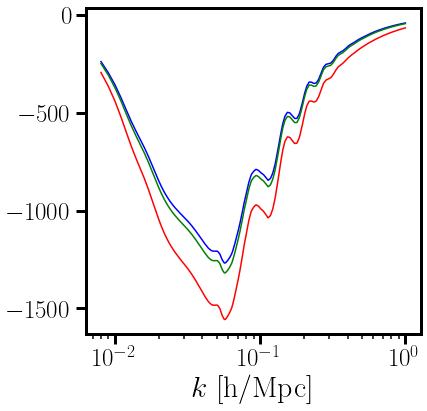

fEDE_5447_375.txt


<Figure size 432x288 with 0 Axes>

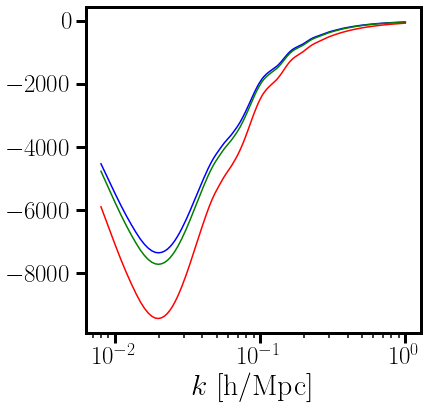

m_ncdm_375.txt


<Figure size 432x288 with 0 Axes>

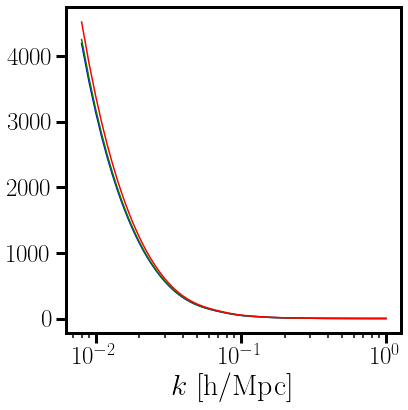

f_NL_475.txt


<Figure size 432x288 with 0 Axes>

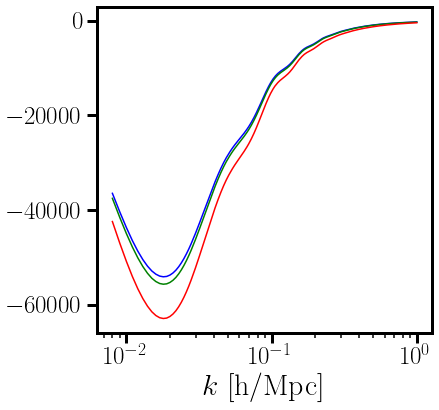

fEDE_2026_475.txt


<Figure size 432x288 with 0 Axes>

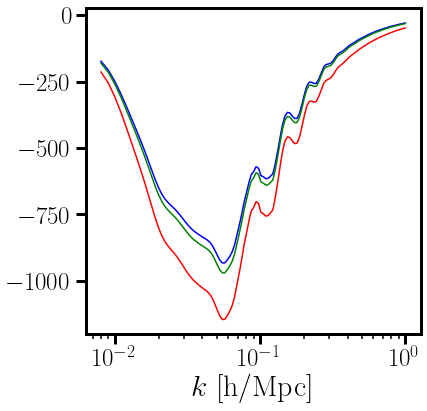

fEDE_5710_375.txt


<Figure size 432x288 with 0 Axes>

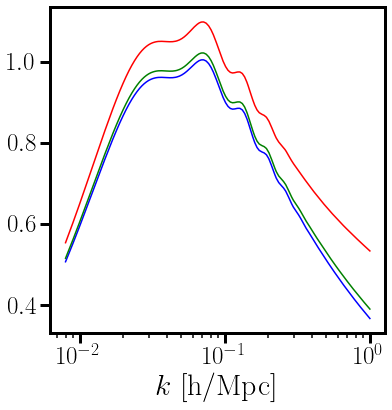

f_NL_eq_425.txt


<Figure size 432x288 with 0 Axes>

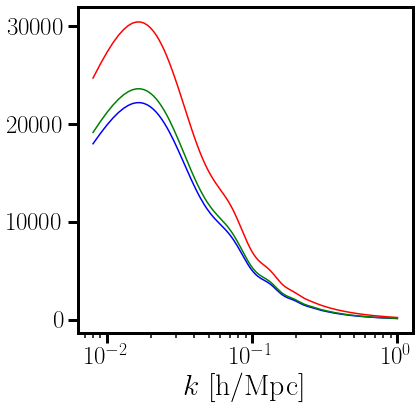

A_lin_1_275.txt


<Figure size 432x288 with 0 Axes>

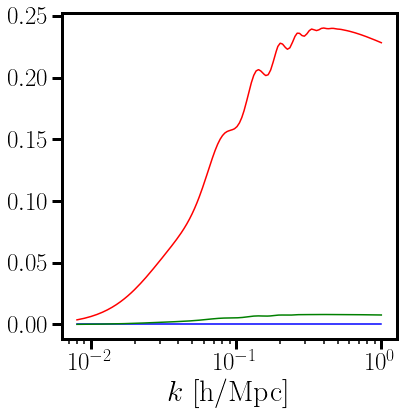

alpha4_375.txt


<Figure size 432x288 with 0 Axes>

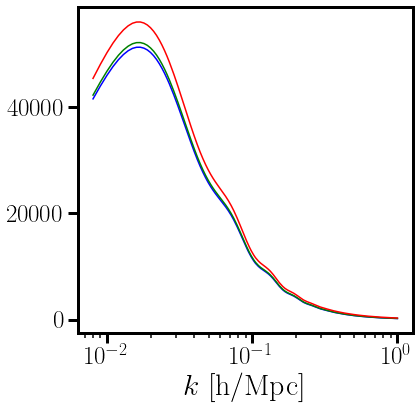

b_425.txt


<Figure size 432x288 with 0 Axes>

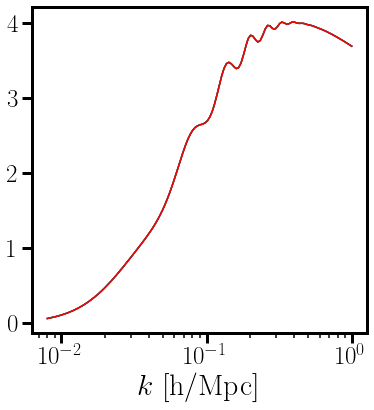

alpha0_475.txt


<Figure size 432x288 with 0 Axes>

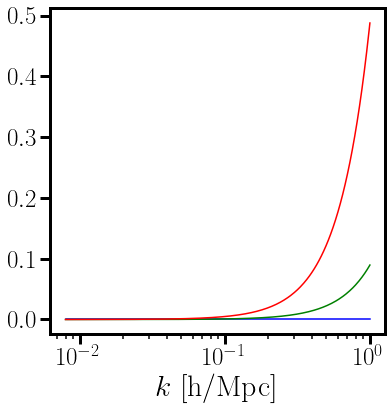

sn2_375.txt


<Figure size 432x288 with 0 Axes>

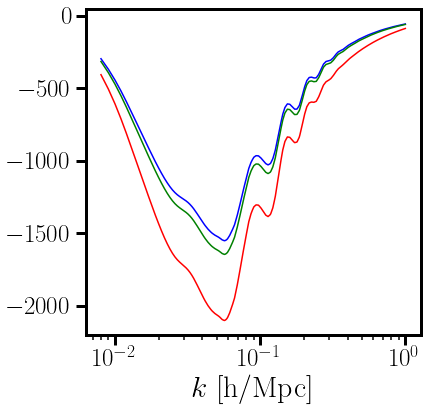

fEDE_4921_275.txt


<Figure size 432x288 with 0 Axes>

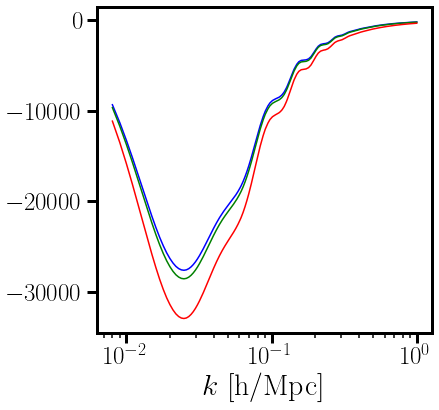

fEDE_3078_425.txt


<Figure size 432x288 with 0 Axes>

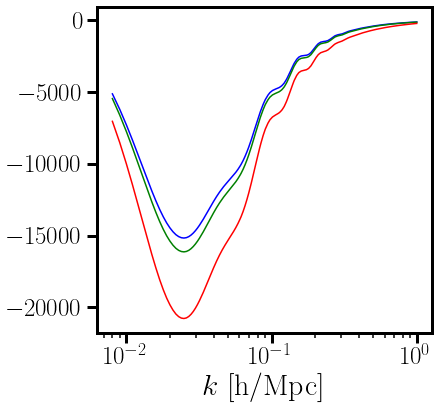

fEDE_3078_275.txt


<Figure size 432x288 with 0 Axes>

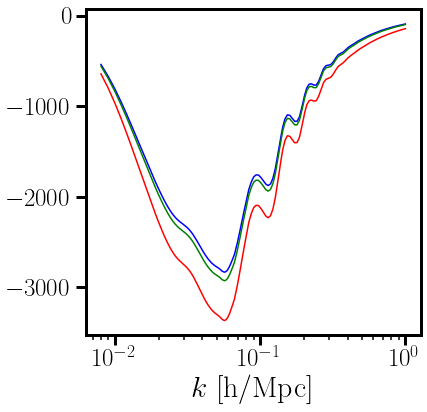

fEDE_4921_425.txt


<Figure size 432x288 with 0 Axes>

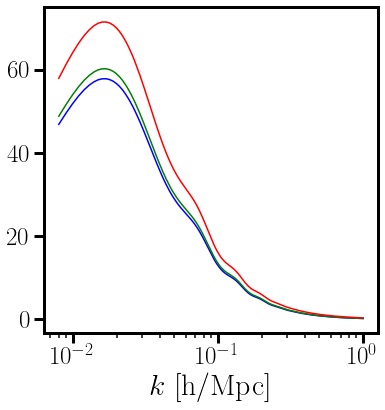

Hz_375.txt


<Figure size 432x288 with 0 Axes>

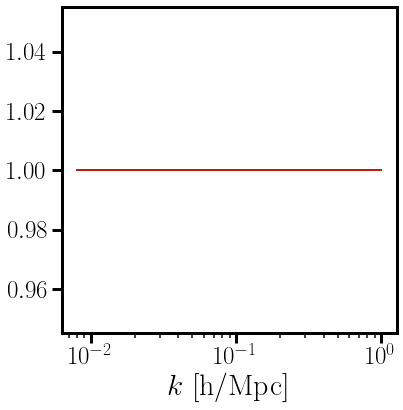

N_475.txt


<Figure size 432x288 with 0 Axes>

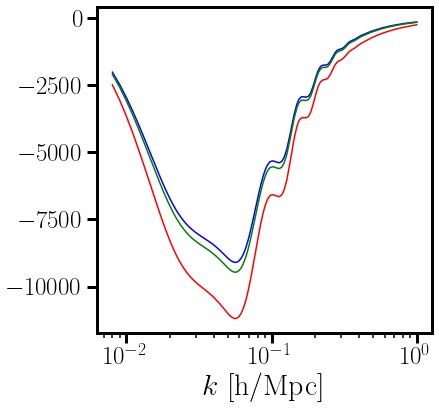

fEDE_3868_375.txt


<Figure size 432x288 with 0 Axes>

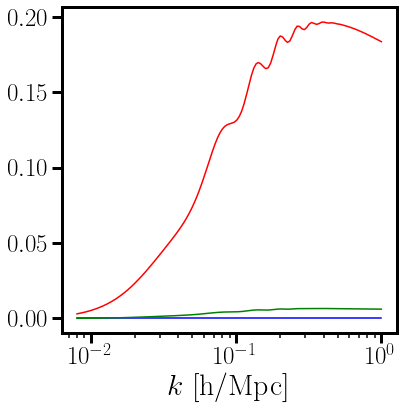

alpha4_425.txt


<Figure size 432x288 with 0 Axes>

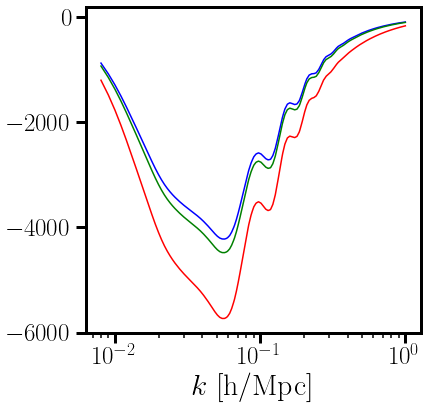

fEDE_4131_275.txt


<Figure size 432x288 with 0 Axes>

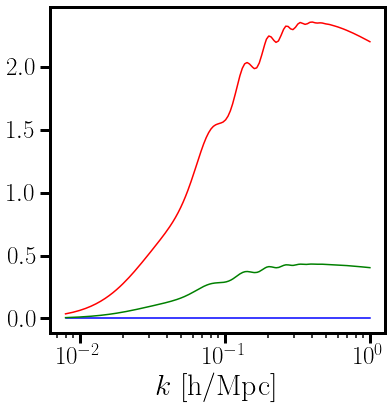

alpha2_425.txt


<Figure size 432x288 with 0 Axes>

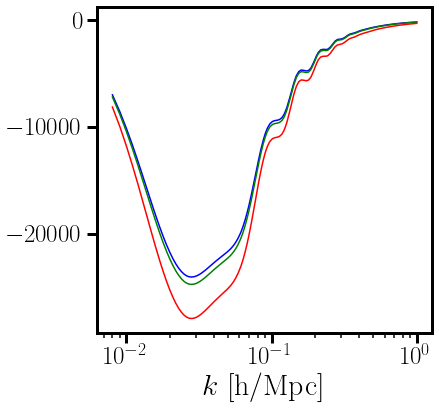

fEDE_3342_475.txt


<Figure size 432x288 with 0 Axes>

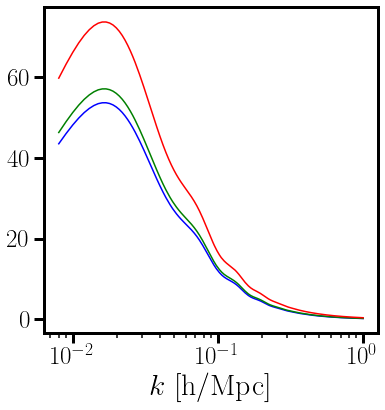

Hz_275.txt


<Figure size 432x288 with 0 Axes>

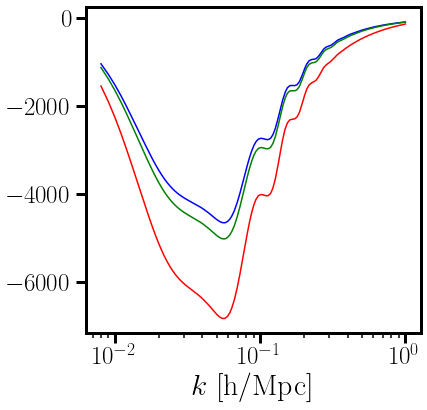

fEDE_3868_225.txt


<Figure size 432x288 with 0 Axes>

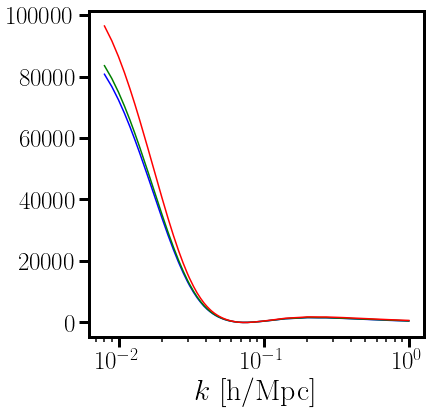

alpha_s_425.txt


<Figure size 432x288 with 0 Axes>

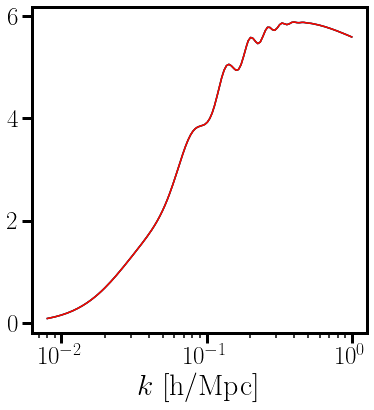

alpha0_375.txt


<Figure size 432x288 with 0 Axes>

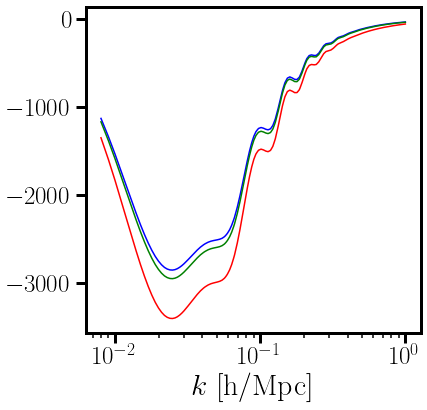

N_ur_425.txt


<Figure size 432x288 with 0 Axes>

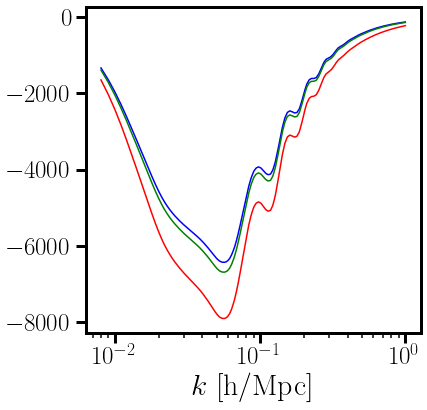

fEDE_4131_375.txt


<Figure size 432x288 with 0 Axes>

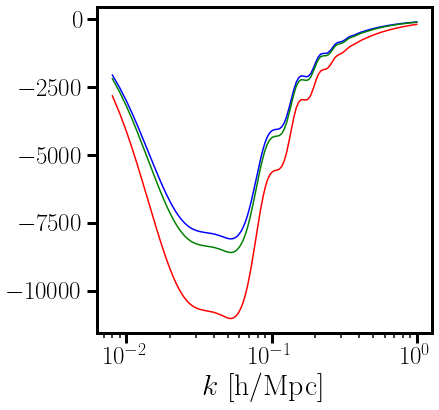

fEDE_3605_275.txt


<Figure size 432x288 with 0 Axes>

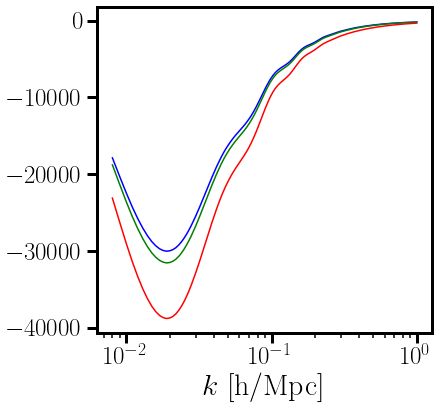

fEDE_2289_325.txt


<Figure size 432x288 with 0 Axes>

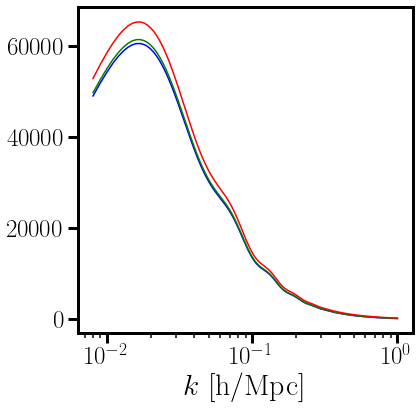

b_475.txt


<Figure size 432x288 with 0 Axes>

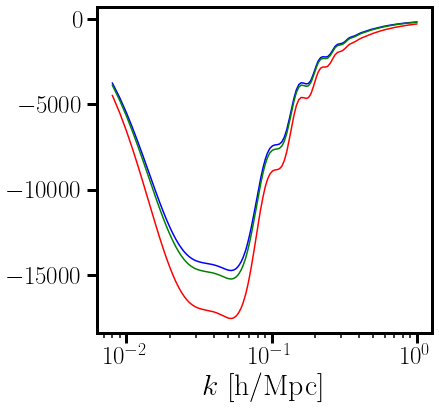

fEDE_3605_425.txt


<Figure size 432x288 with 0 Axes>

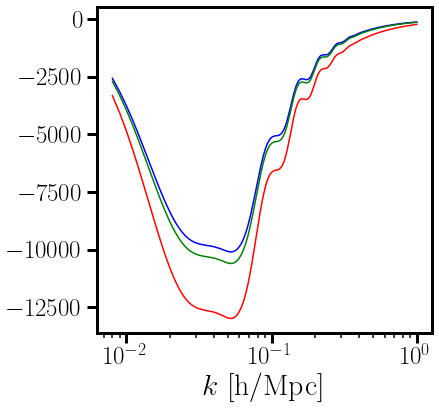

fEDE_3605_325.txt


<Figure size 432x288 with 0 Axes>

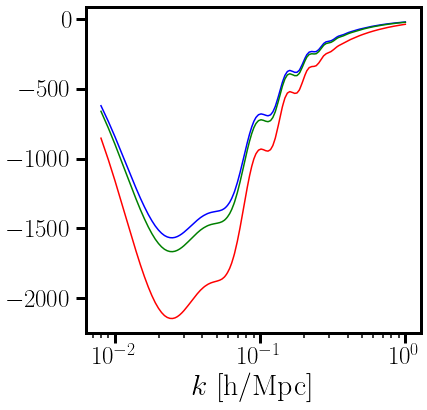

N_ur_275.txt


<Figure size 432x288 with 0 Axes>

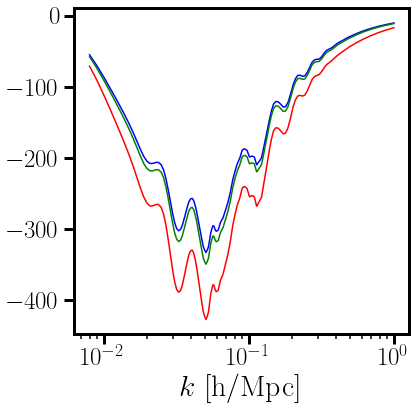

fEDE_6500_325.txt


<Figure size 432x288 with 0 Axes>

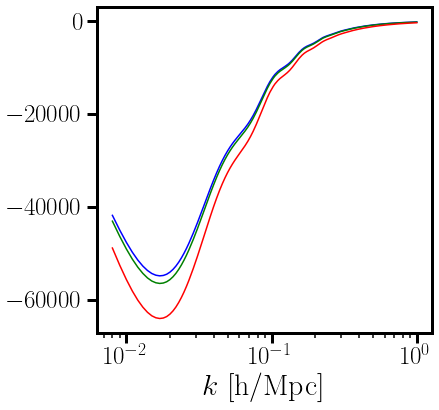

fEDE_1500_475.txt


<Figure size 432x288 with 0 Axes>

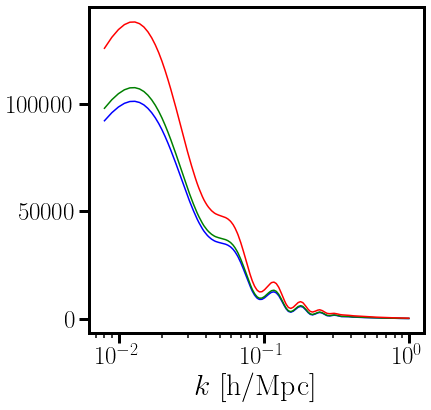

h_275.txt


<Figure size 432x288 with 0 Axes>

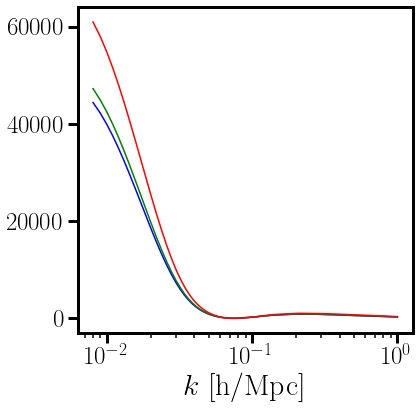

alpha_s_275.txt


<Figure size 432x288 with 0 Axes>

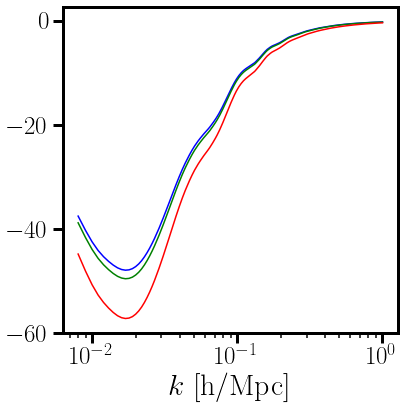

tau_reio_425.txt


<Figure size 432x288 with 0 Axes>

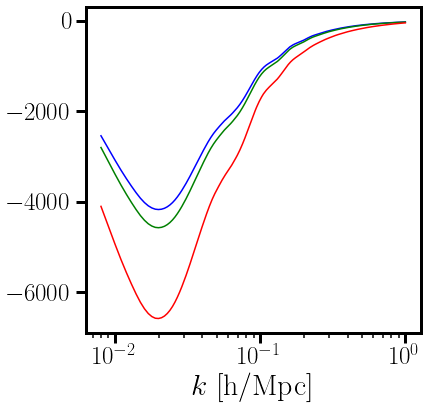

m_ncdm_225.txt


<Figure size 432x288 with 0 Axes>

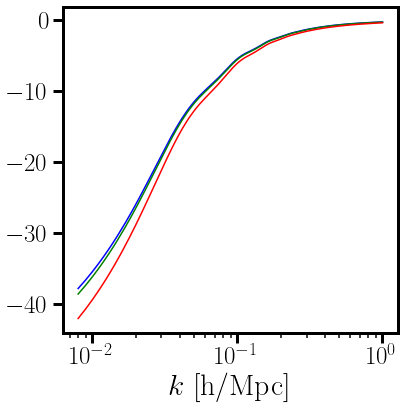

f_NL_orth_375.txt


<Figure size 432x288 with 0 Axes>

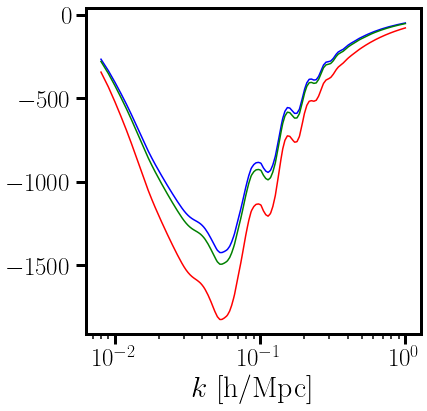

fEDE_5184_325.txt


<Figure size 432x288 with 0 Axes>

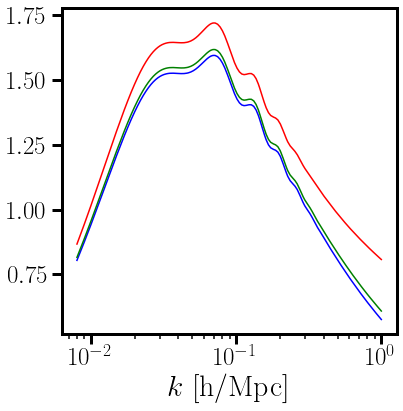

f_NL_eq_475.txt


<Figure size 432x288 with 0 Axes>

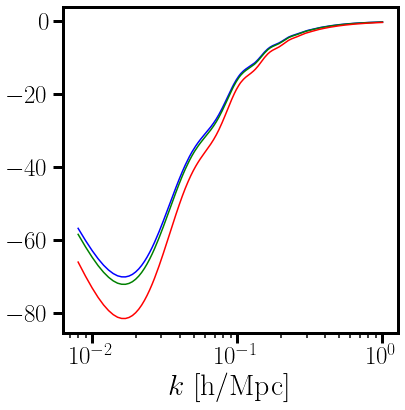

Da_475.txt


<Figure size 432x288 with 0 Axes>

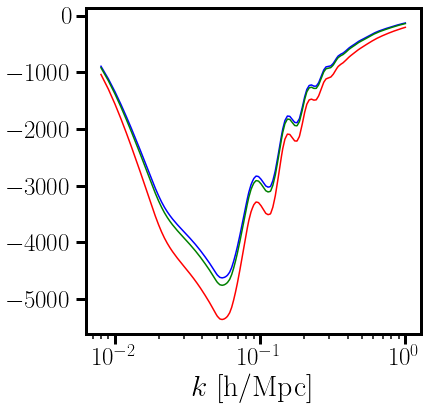

fEDE_4657_475.txt


<Figure size 432x288 with 0 Axes>

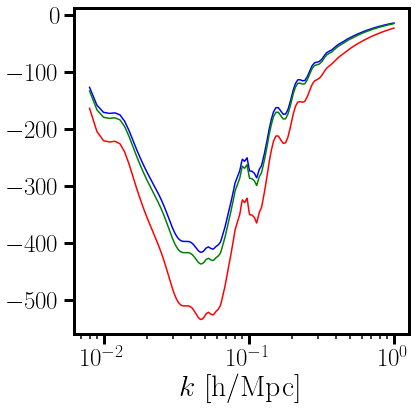

fEDE_6236_325.txt


<Figure size 432x288 with 0 Axes>

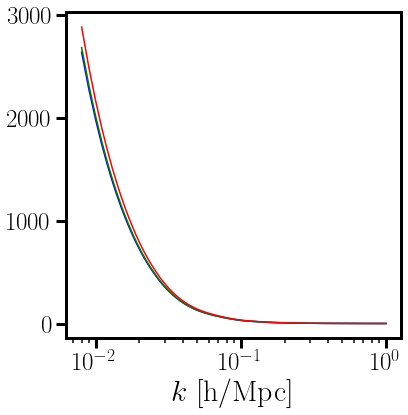

f_NL_425.txt


<Figure size 432x288 with 0 Axes>

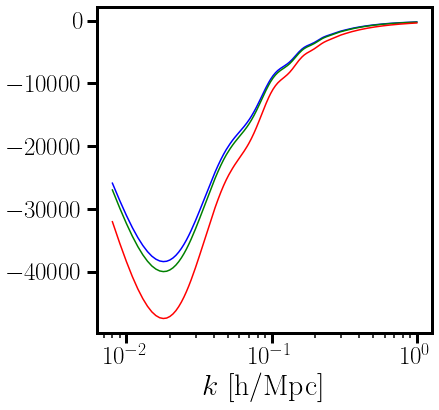

fEDE_2026_375.txt


<Figure size 432x288 with 0 Axes>

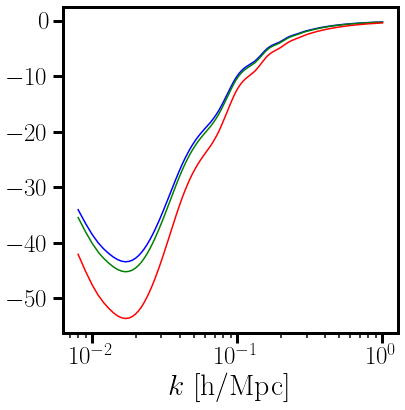

tau_reio_375.txt


<Figure size 432x288 with 0 Axes>

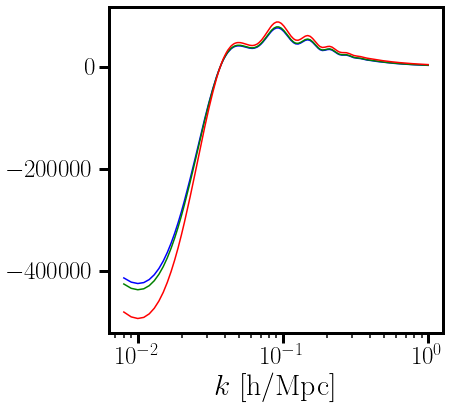

omega_cdm_475.txt


<Figure size 432x288 with 0 Axes>

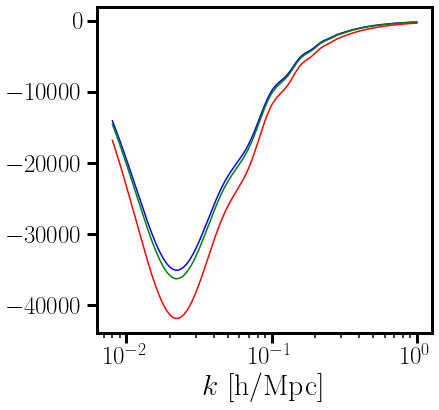

fEDE_2815_425.txt


<Figure size 432x288 with 0 Axes>

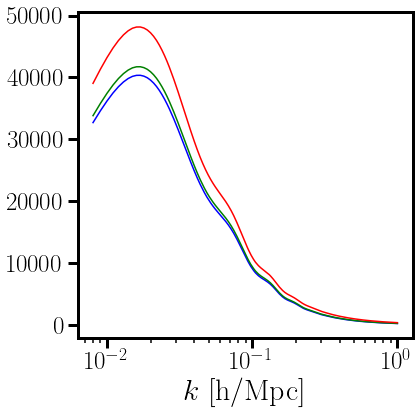

log(A_s)_425.txt


<Figure size 432x288 with 0 Axes>

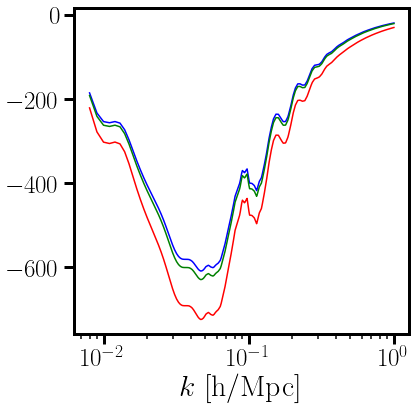

fEDE_6236_425.txt


<Figure size 432x288 with 0 Axes>

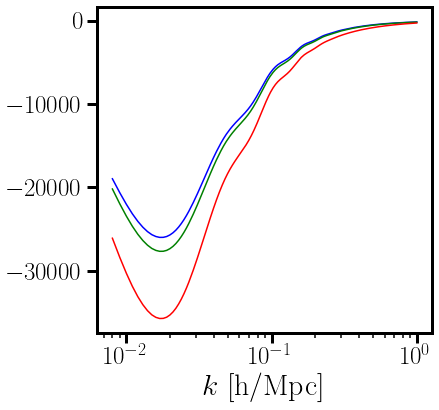

fEDE_1763_275.txt


<Figure size 432x288 with 0 Axes>

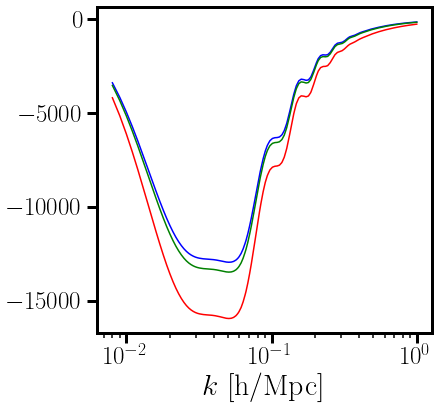

fEDE_3562_375.txt


<Figure size 432x288 with 0 Axes>

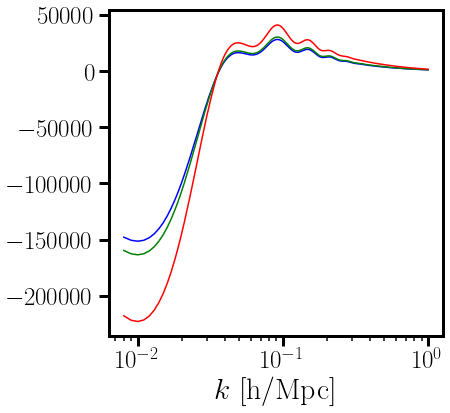

omega_cdm_225.txt


<Figure size 432x288 with 0 Axes>

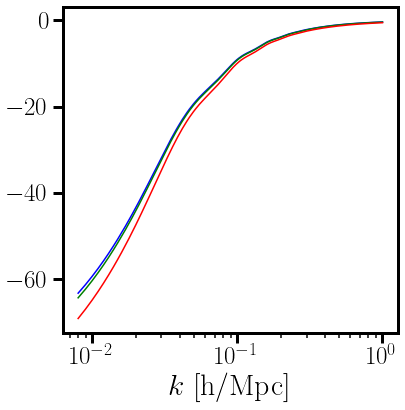

f_NL_orth_425.txt


<Figure size 432x288 with 0 Axes>

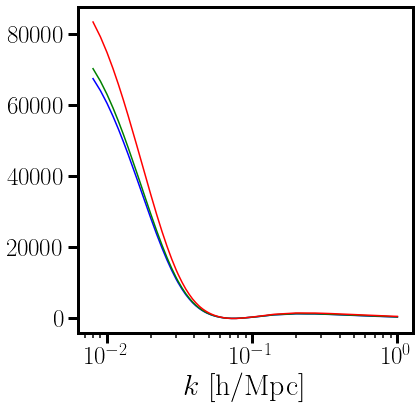

alpha_s_375.txt


<Figure size 432x288 with 0 Axes>

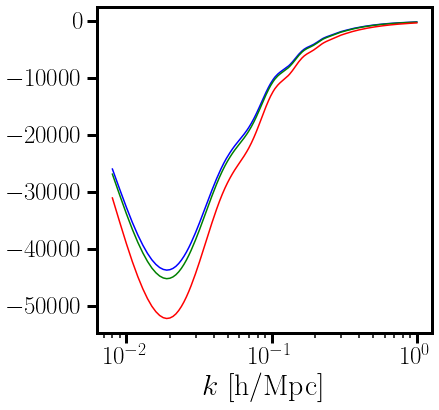

fEDE_2289_425.txt


<Figure size 432x288 with 0 Axes>

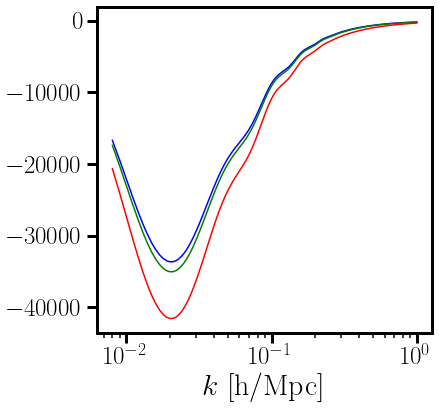

fEDE_2552_375.txt


<Figure size 432x288 with 0 Axes>

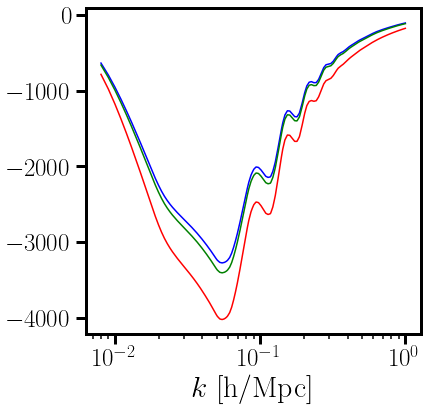

fEDE_4657_375.txt


<Figure size 432x288 with 0 Axes>

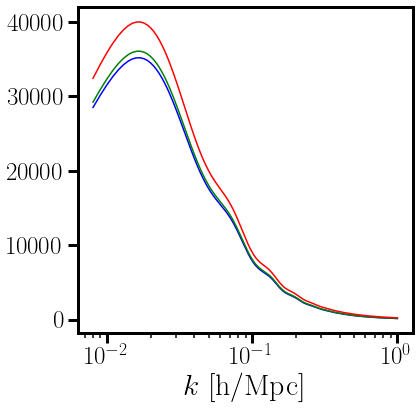

b_325.txt


<Figure size 432x288 with 0 Axes>

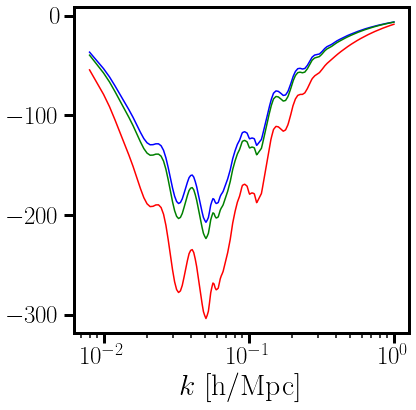

fEDE_6500_225.txt


<Figure size 432x288 with 0 Axes>

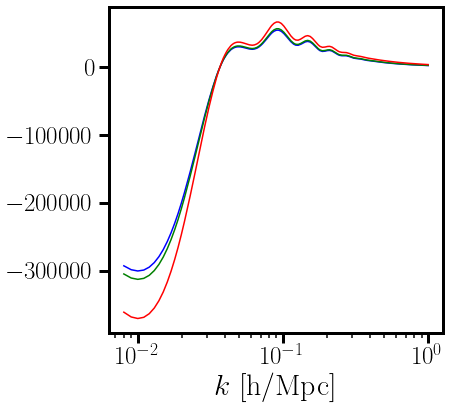

omega_cdm_375.txt


<Figure size 432x288 with 0 Axes>

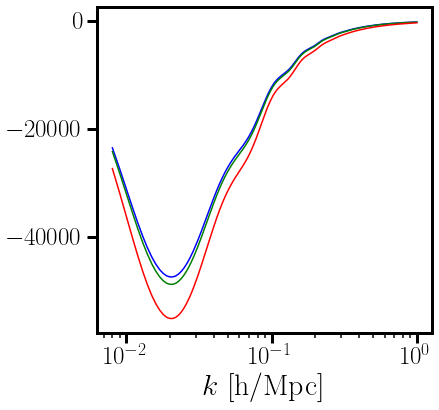

fEDE_2552_475.txt


<Figure size 432x288 with 0 Axes>

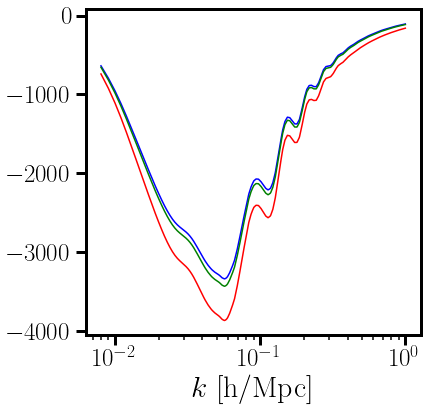

fEDE_4921_475.txt


<Figure size 432x288 with 0 Axes>

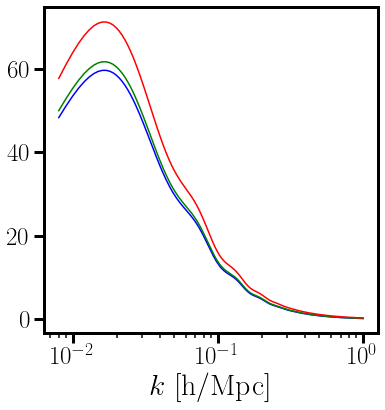

Hz_425.txt


<Figure size 432x288 with 0 Axes>

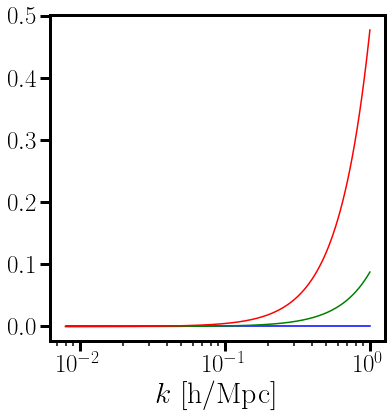

sn2_225.txt


<Figure size 432x288 with 0 Axes>

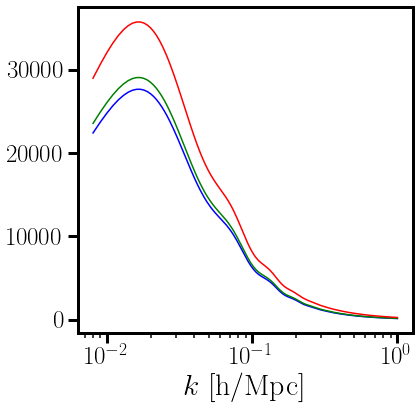

A_lin_1_325.txt


<Figure size 432x288 with 0 Axes>

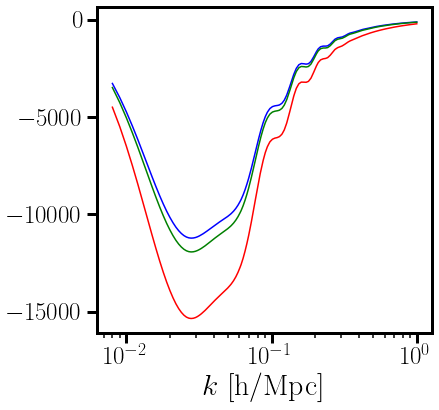

fEDE_3342_275.txt


<Figure size 432x288 with 0 Axes>

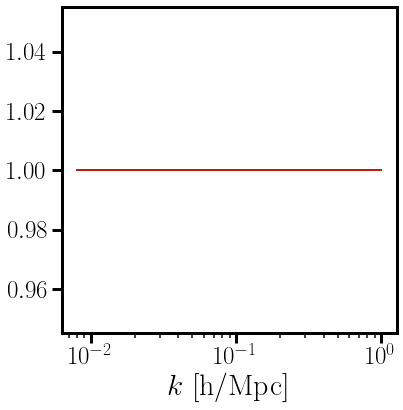

N_375.txt


<Figure size 432x288 with 0 Axes>

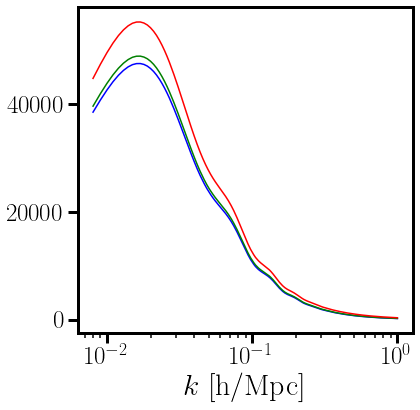

log(A_s)_475.txt


<Figure size 432x288 with 0 Axes>

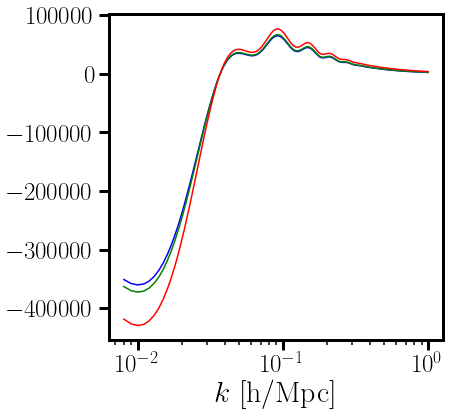

omega_cdm_425.txt


<Figure size 432x288 with 0 Axes>

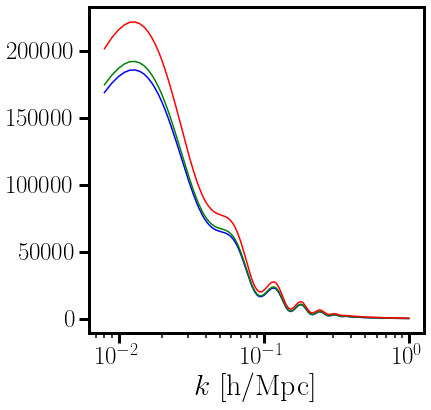

h_425.txt


<Figure size 432x288 with 0 Axes>

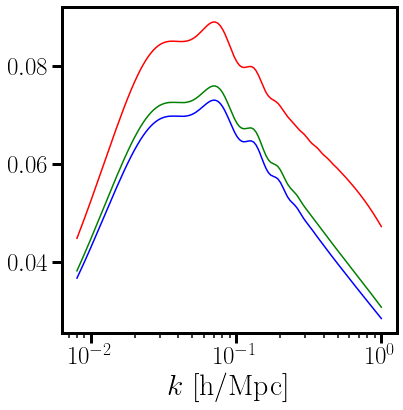

f_NL_eq_225.txt


<Figure size 432x288 with 0 Axes>

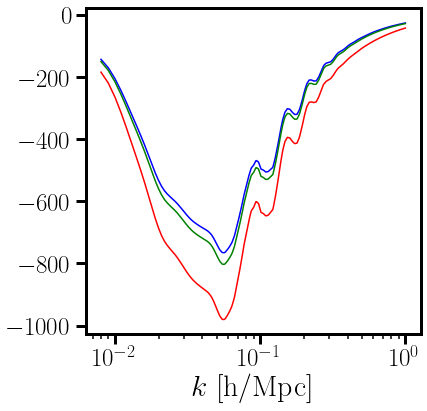

fEDE_5710_325.txt


<Figure size 432x288 with 0 Axes>

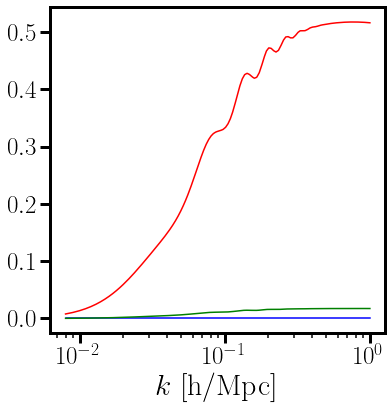

alpha4_225.txt


<Figure size 432x288 with 0 Axes>

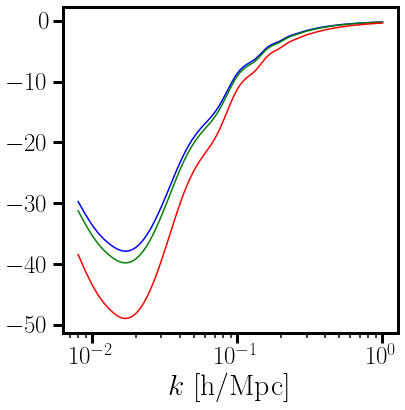

tau_reio_325.txt


<Figure size 432x288 with 0 Axes>

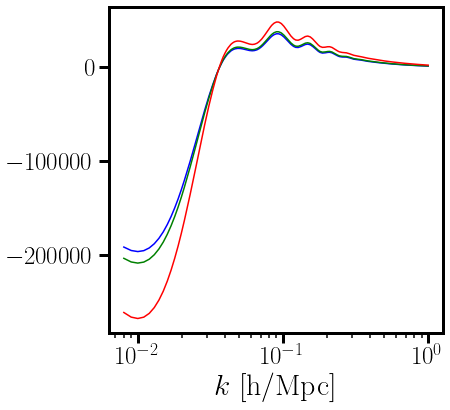

omega_cdm_275.txt


<Figure size 432x288 with 0 Axes>

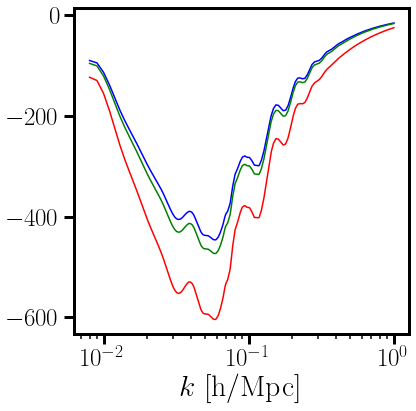

fEDE_5973_275.txt


<Figure size 432x288 with 0 Axes>

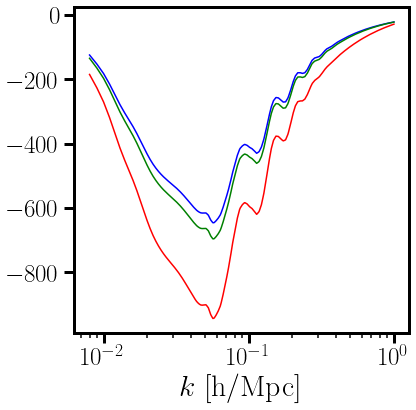

fEDE_5447_225.txt


<Figure size 432x288 with 0 Axes>

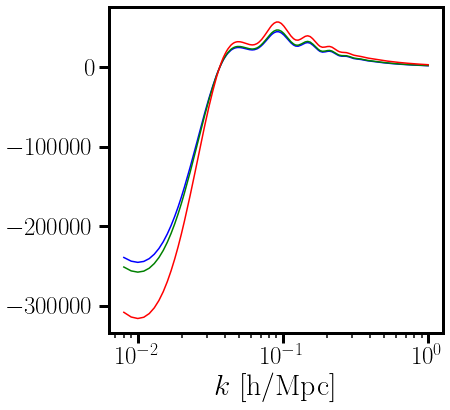

omega_cdm_325.txt


<Figure size 432x288 with 0 Axes>

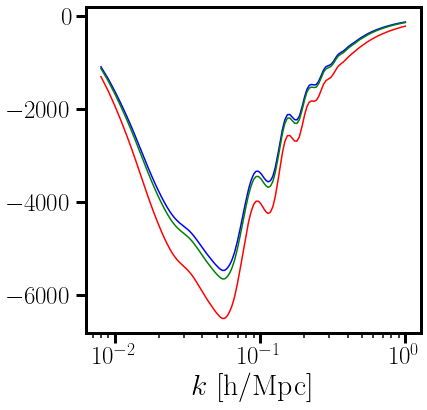

fEDE_4394_425.txt


<Figure size 432x288 with 0 Axes>

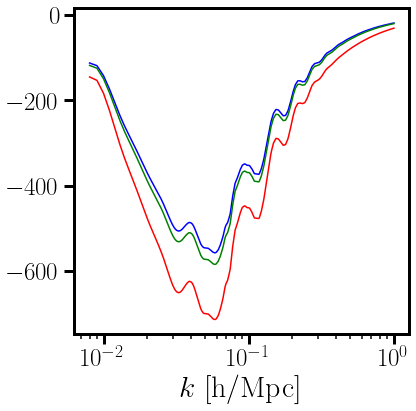

fEDE_5973_325.txt


<Figure size 432x288 with 0 Axes>

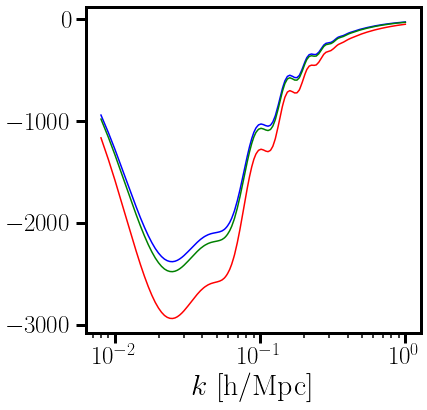

N_ur_375.txt


<Figure size 432x288 with 0 Axes>

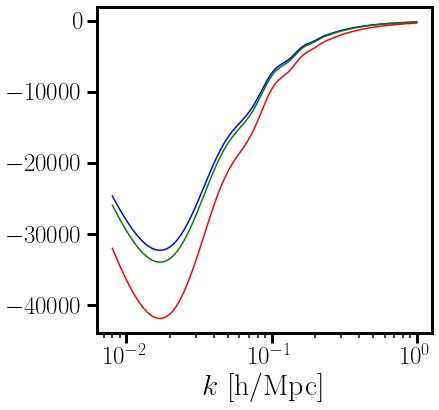

fEDE_1500_325.txt


<Figure size 432x288 with 0 Axes>

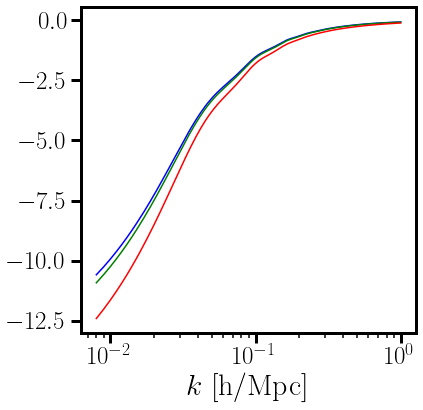

f_NL_orth_275.txt


<Figure size 432x288 with 0 Axes>

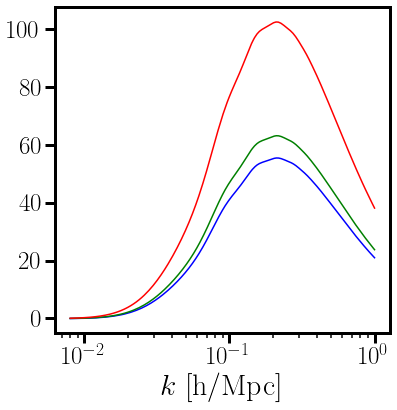

b2_225.txt


<Figure size 432x288 with 0 Axes>

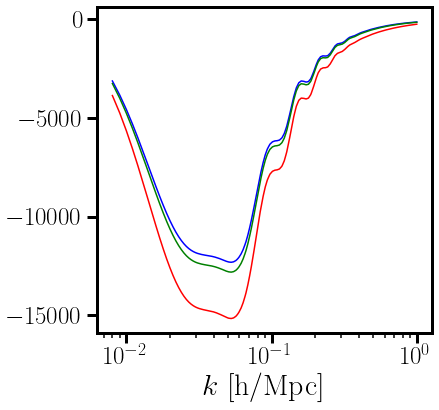

fEDE_3605_375.txt


<Figure size 432x288 with 0 Axes>

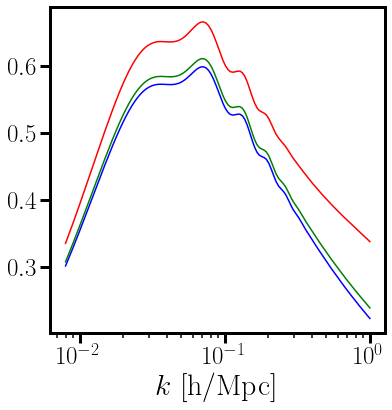

f_NL_eq_375.txt


<Figure size 432x288 with 0 Axes>

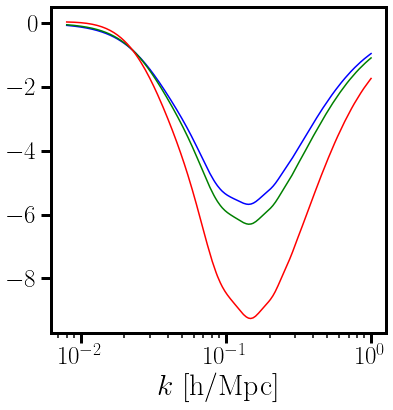

bs_475.txt


<Figure size 432x288 with 0 Axes>

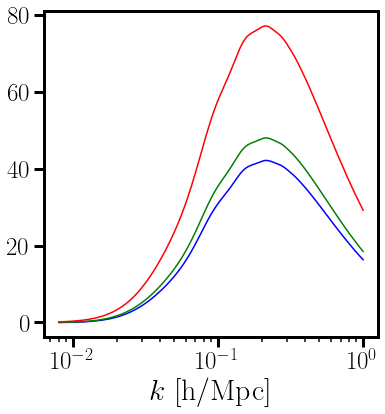

b2_275.txt


<Figure size 432x288 with 0 Axes>

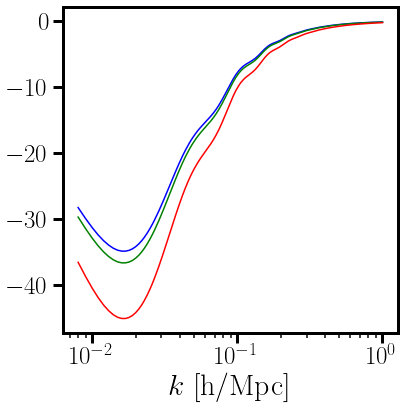

Da_325.txt


<Figure size 432x288 with 0 Axes>

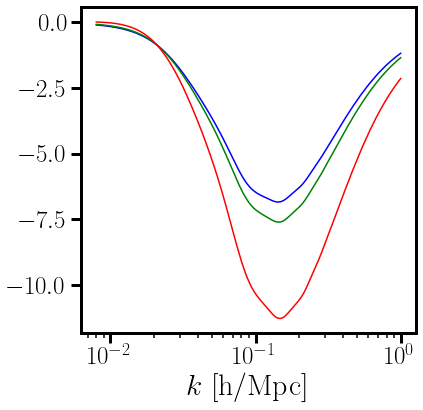

bs_425.txt


<Figure size 432x288 with 0 Axes>

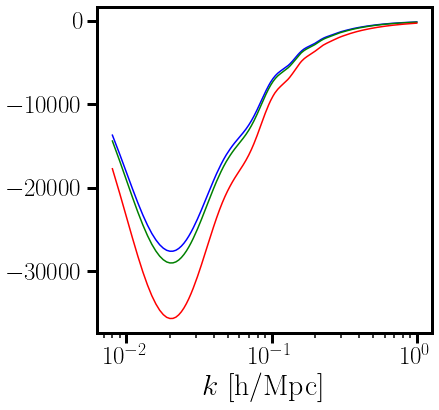

fEDE_2552_325.txt


<Figure size 432x288 with 0 Axes>

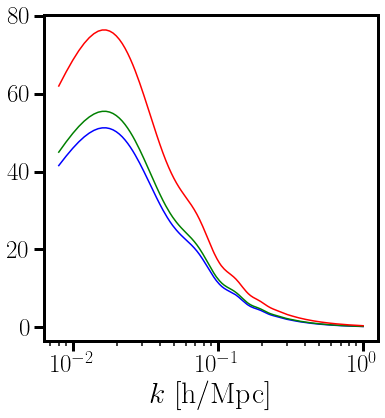

Hz_225.txt


<Figure size 432x288 with 0 Axes>

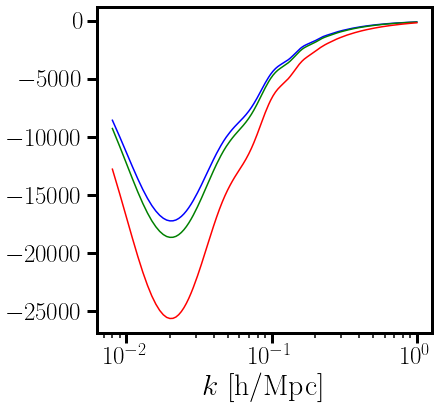

fEDE_2552_225.txt


<Figure size 432x288 with 0 Axes>

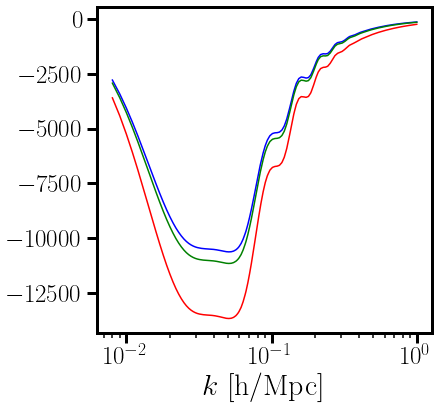

fEDE_3562_325.txt


<Figure size 432x288 with 0 Axes>

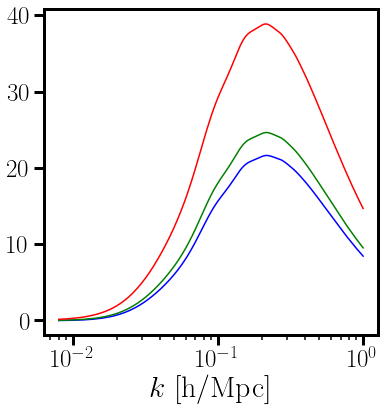

b2_425.txt


<Figure size 432x288 with 0 Axes>

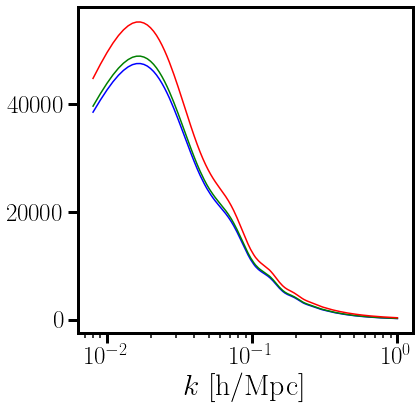

A_lin_1_475.txt


<Figure size 432x288 with 0 Axes>

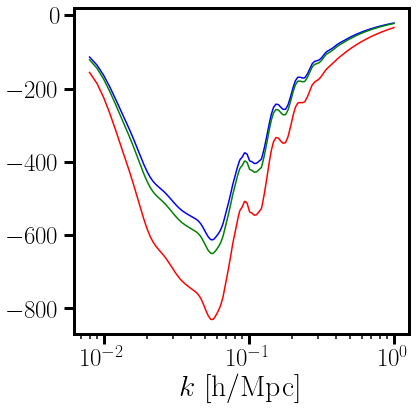

fEDE_5710_275.txt


<Figure size 432x288 with 0 Axes>

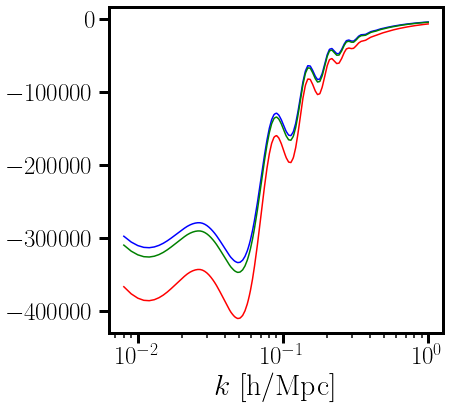

omega_b_375.txt


<Figure size 432x288 with 0 Axes>

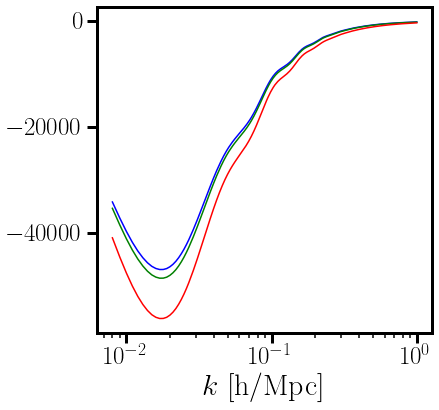

fEDE_1763_425.txt


<Figure size 432x288 with 0 Axes>

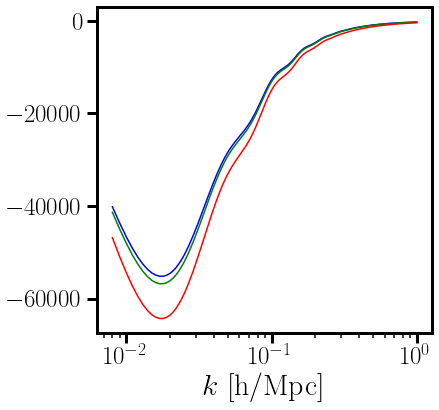

fEDE_1763_475.txt


<Figure size 432x288 with 0 Axes>

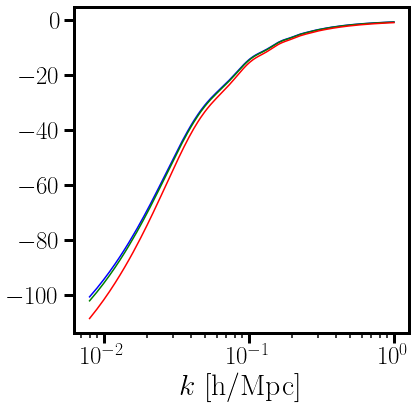

f_NL_orth_475.txt


<Figure size 432x288 with 0 Axes>

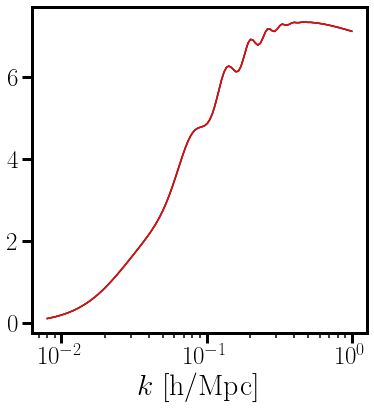

alpha0_325.txt


<Figure size 432x288 with 0 Axes>

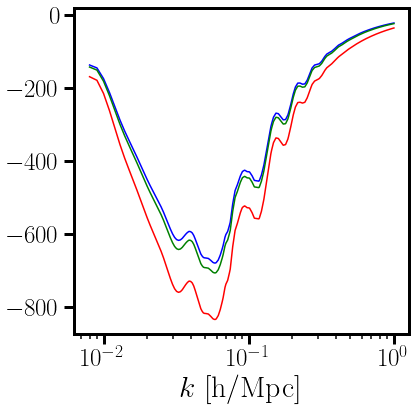

fEDE_5973_375.txt


<Figure size 432x288 with 0 Axes>

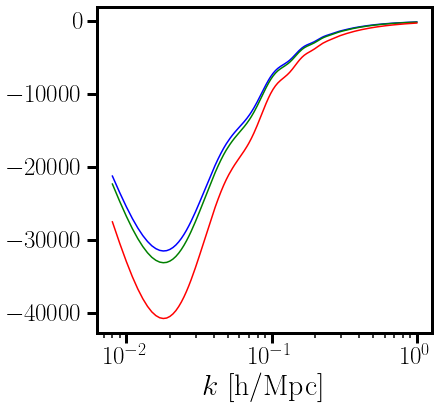

fEDE_2026_325.txt


<Figure size 432x288 with 0 Axes>

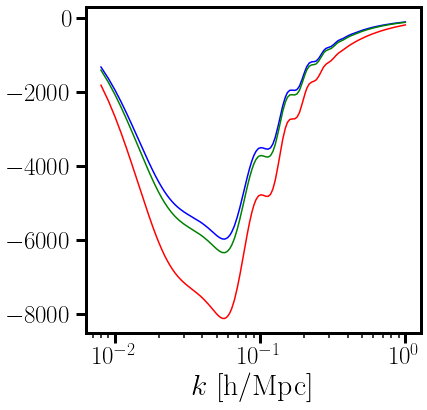

fEDE_3868_275.txt


<Figure size 432x288 with 0 Axes>

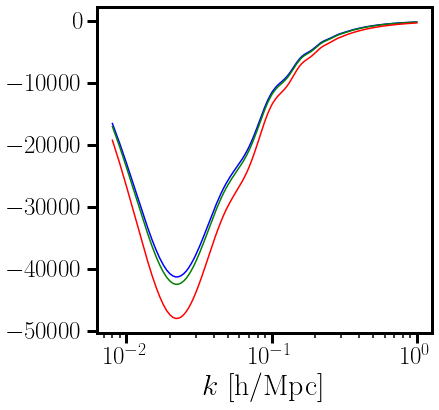

fEDE_2815_475.txt


<Figure size 432x288 with 0 Axes>

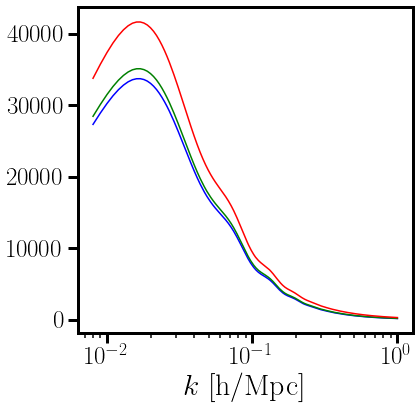

A_lin_1_375.txt


<Figure size 432x288 with 0 Axes>

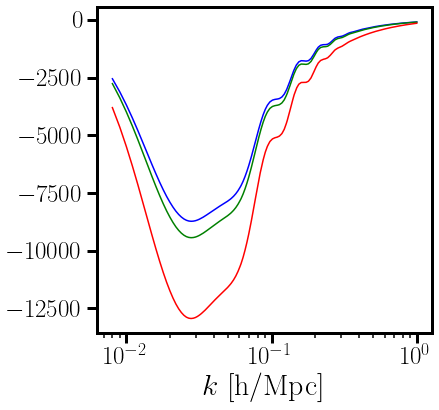

fEDE_3342_225.txt


<Figure size 432x288 with 0 Axes>

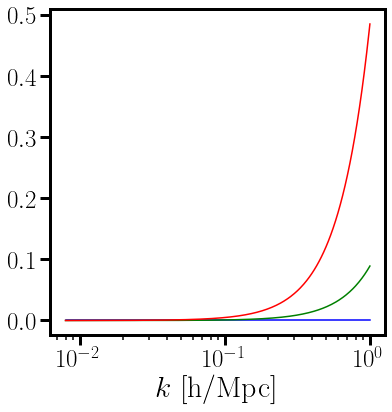

sn2_325.txt


<Figure size 432x288 with 0 Axes>

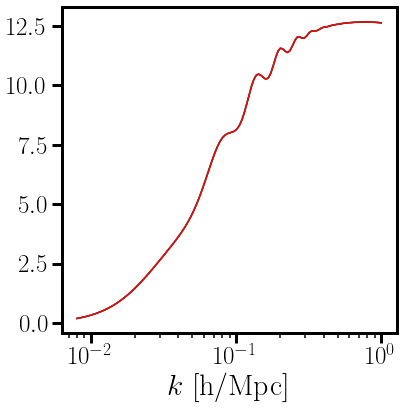

alpha0_225.txt


<Figure size 432x288 with 0 Axes>

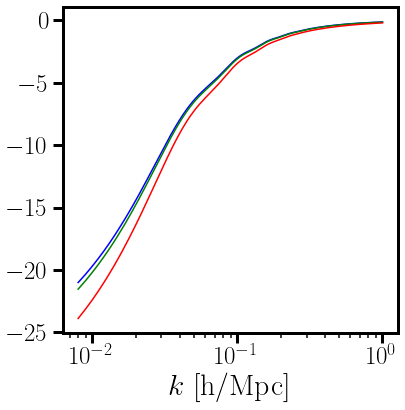

f_NL_orth_325.txt


<Figure size 432x288 with 0 Axes>

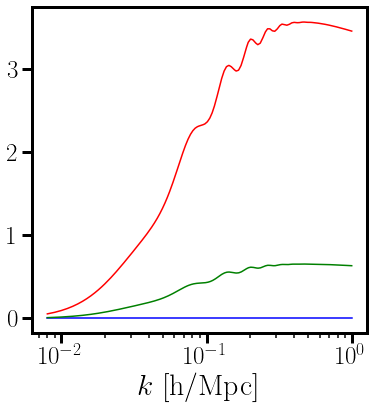

alpha2_325.txt


<Figure size 432x288 with 0 Axes>

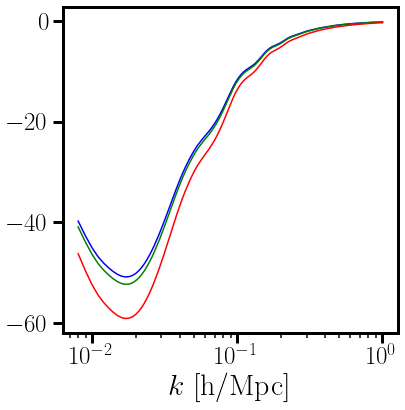

tau_reio_475.txt


<Figure size 432x288 with 0 Axes>

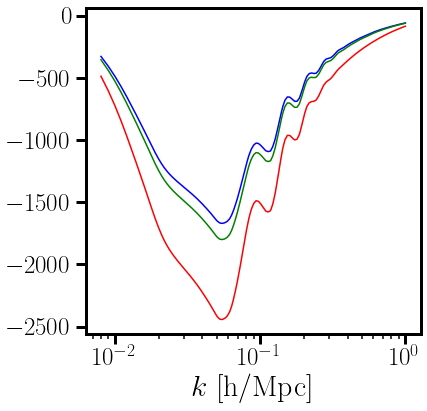

fEDE_4657_225.txt


<Figure size 432x288 with 0 Axes>

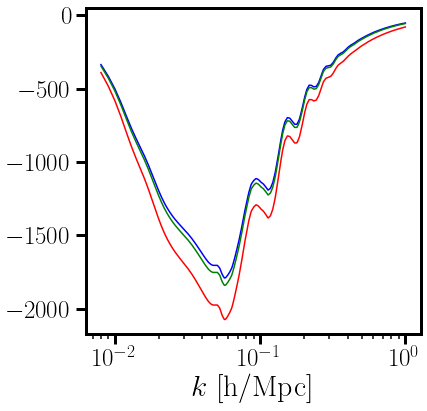

fEDE_5447_475.txt


<Figure size 432x288 with 0 Axes>

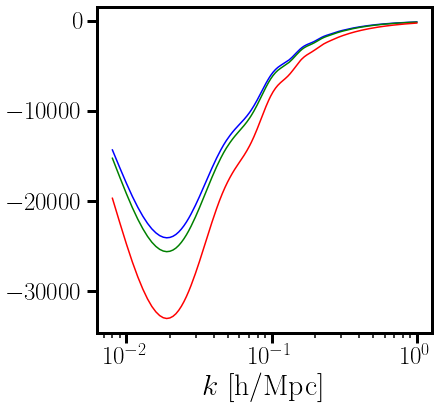

fEDE_2289_275.txt


<Figure size 432x288 with 0 Axes>

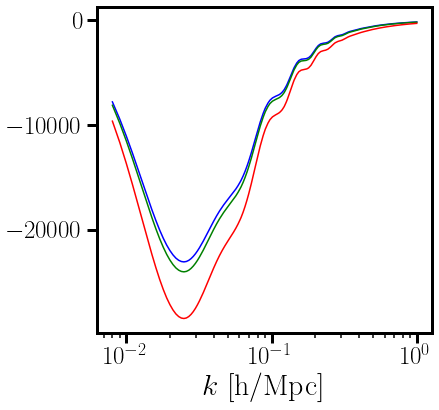

fEDE_3078_375.txt


<Figure size 432x288 with 0 Axes>

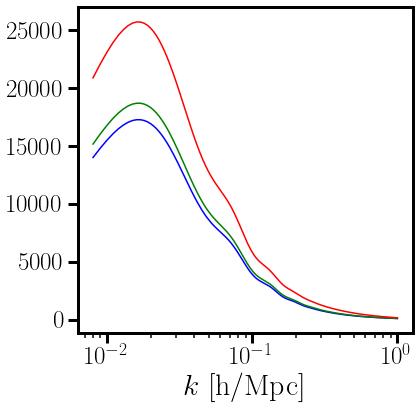

A_lin_1_225.txt


<Figure size 432x288 with 0 Axes>

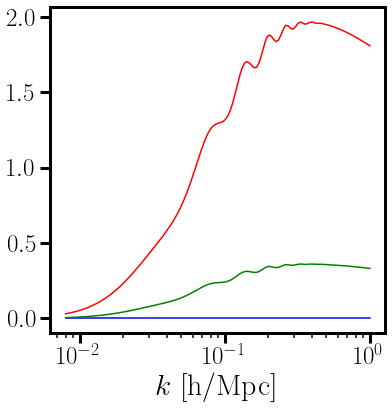

alpha2_475.txt


<Figure size 432x288 with 0 Axes>

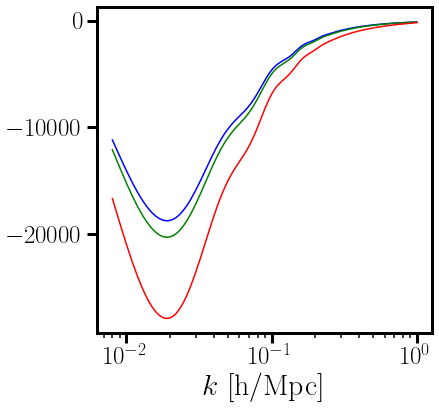

fEDE_2289_225.txt


<Figure size 432x288 with 0 Axes>

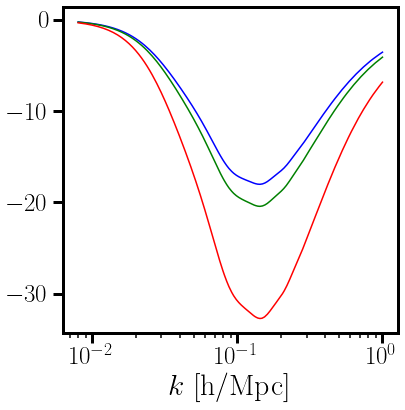

bs_225.txt


<Figure size 432x288 with 0 Axes>

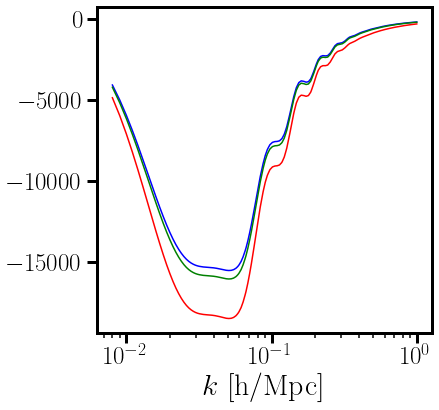

fEDE_3562_425.txt


<Figure size 432x288 with 0 Axes>

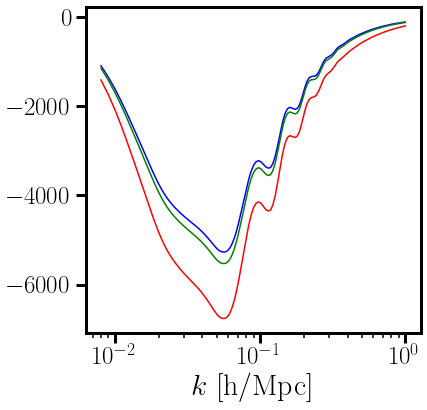

fEDE_4131_325.txt


<Figure size 432x288 with 0 Axes>

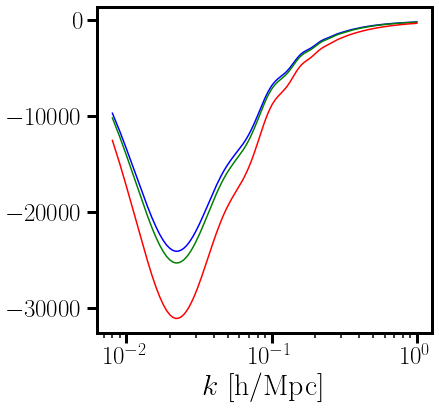

fEDE_2815_325.txt


<Figure size 432x288 with 0 Axes>

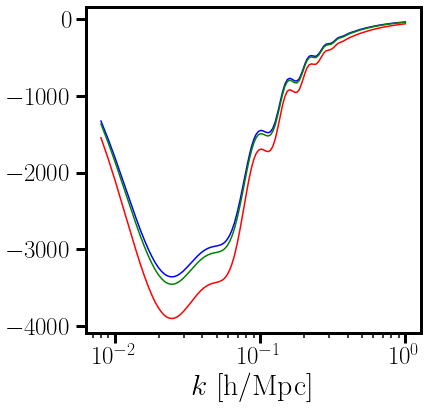

N_ur_475.txt


<Figure size 432x288 with 0 Axes>

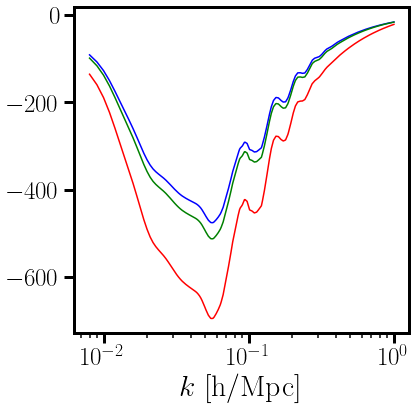

fEDE_5710_225.txt


<Figure size 432x288 with 0 Axes>

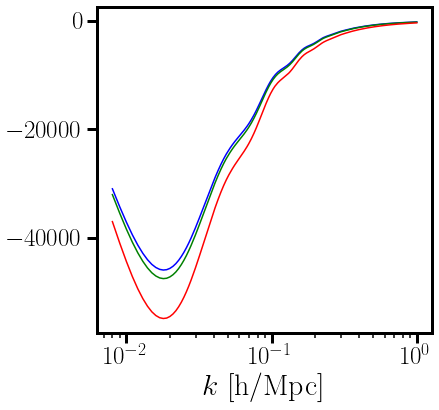

fEDE_2026_425.txt


<Figure size 432x288 with 0 Axes>

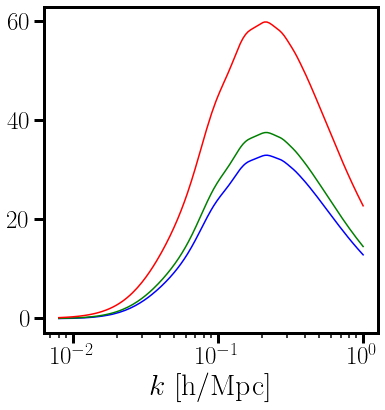

b2_325.txt


<Figure size 432x288 with 0 Axes>

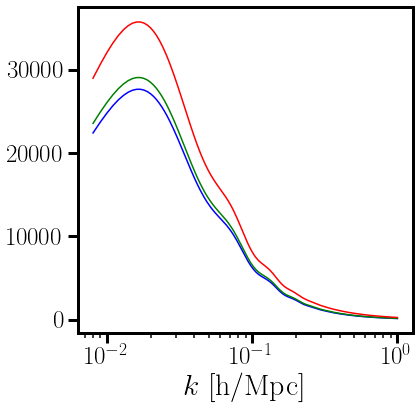

log(A_s)_325.txt


<Figure size 432x288 with 0 Axes>

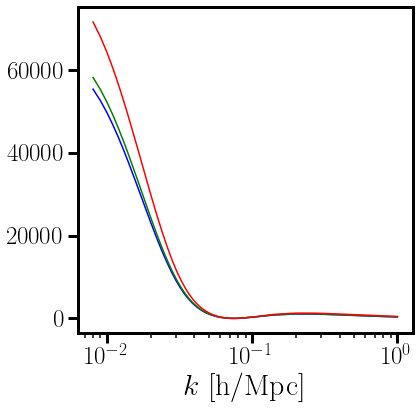

alpha_s_325.txt


<Figure size 432x288 with 0 Axes>

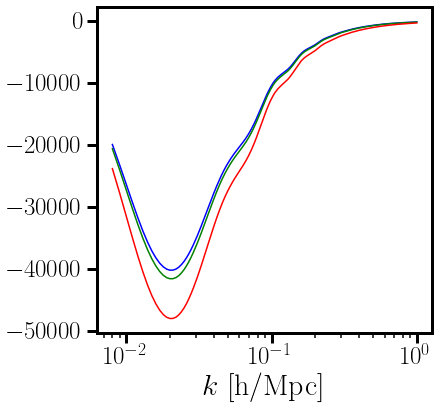

fEDE_2552_425.txt


<Figure size 432x288 with 0 Axes>

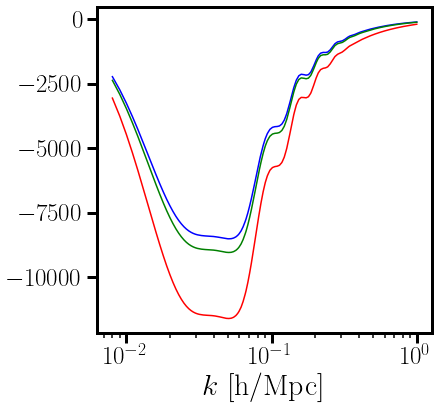

fEDE_3562_275.txt


<Figure size 432x288 with 0 Axes>

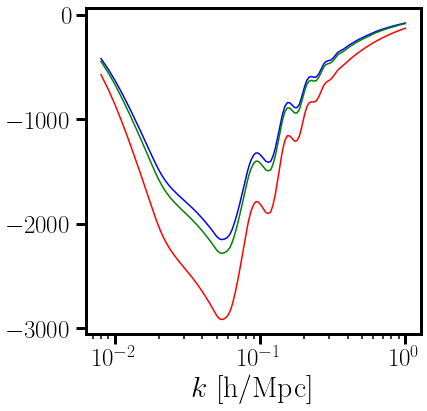

fEDE_4657_275.txt


<Figure size 432x288 with 0 Axes>

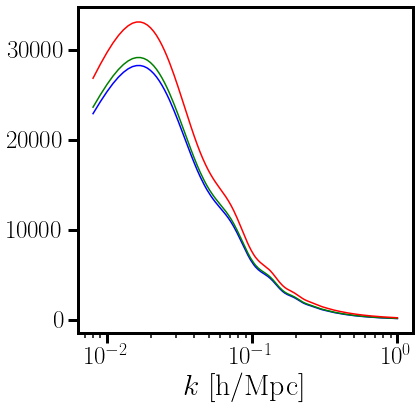

b_275.txt


<Figure size 432x288 with 0 Axes>

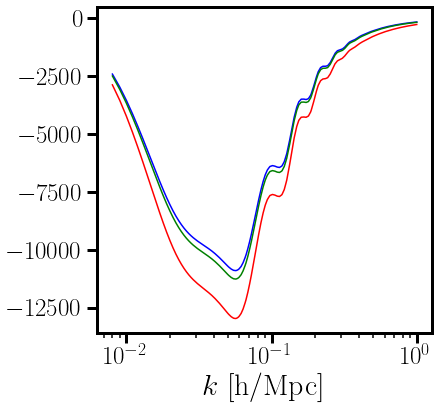

fEDE_3868_425.txt


<Figure size 432x288 with 0 Axes>

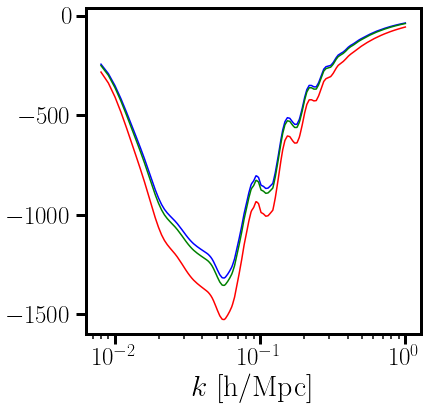

fEDE_5710_475.txt


<Figure size 432x288 with 0 Axes>

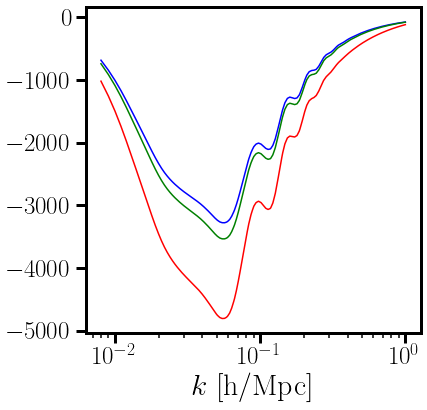

fEDE_4131_225.txt


<Figure size 432x288 with 0 Axes>

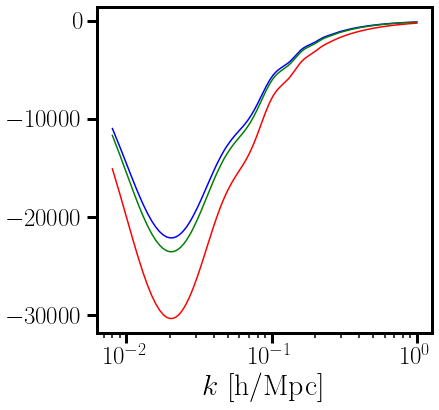

fEDE_2552_275.txt


<Figure size 432x288 with 0 Axes>

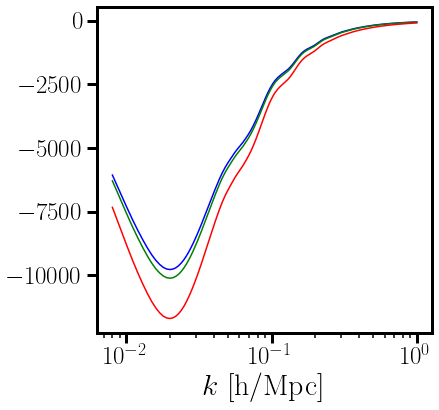

m_ncdm_475.txt


<Figure size 432x288 with 0 Axes>

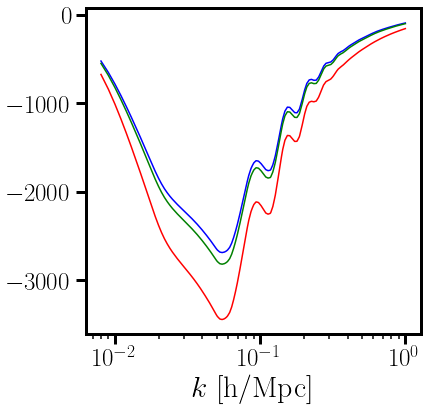

fEDE_4657_325.txt


<Figure size 432x288 with 0 Axes>

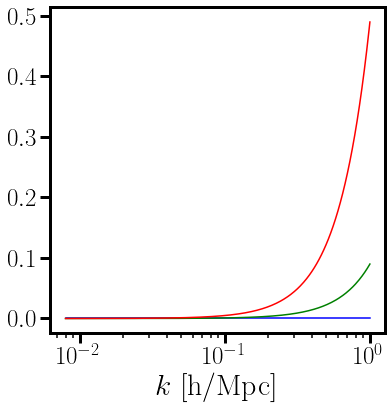

sn2_475.txt


<Figure size 432x288 with 0 Axes>

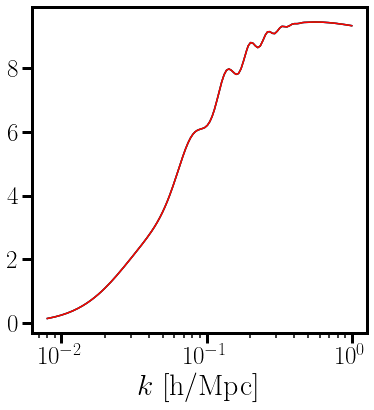

alpha0_275.txt


<Figure size 432x288 with 0 Axes>

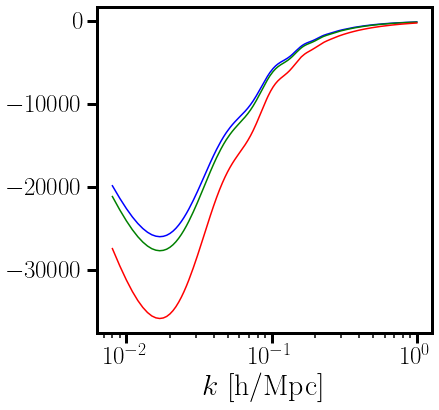

fEDE_1500_275.txt


<Figure size 432x288 with 0 Axes>

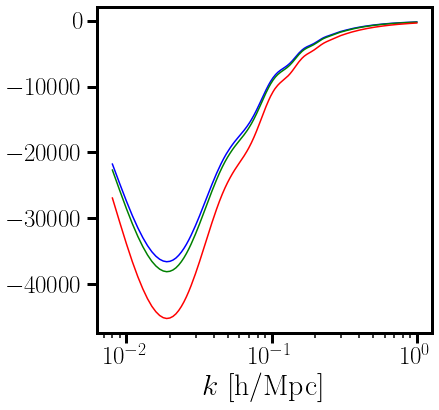

fEDE_2289_375.txt


<Figure size 432x288 with 0 Axes>

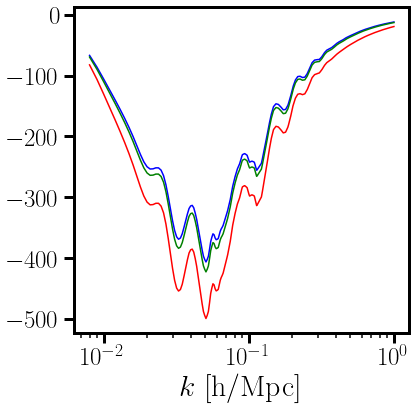

fEDE_6500_375.txt


<Figure size 432x288 with 0 Axes>

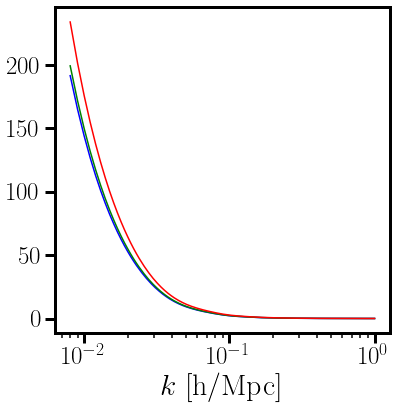

f_NL_225.txt


<Figure size 432x288 with 0 Axes>

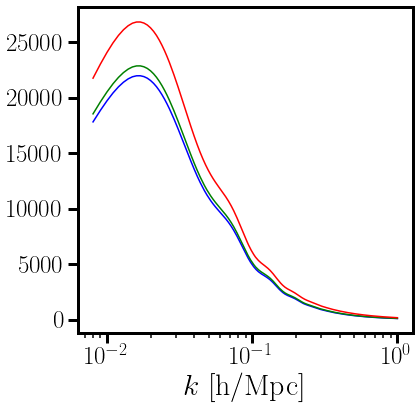

b_225.txt


<Figure size 432x288 with 0 Axes>

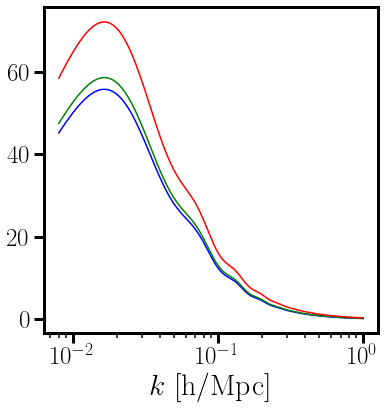

Hz_325.txt


<Figure size 432x288 with 0 Axes>

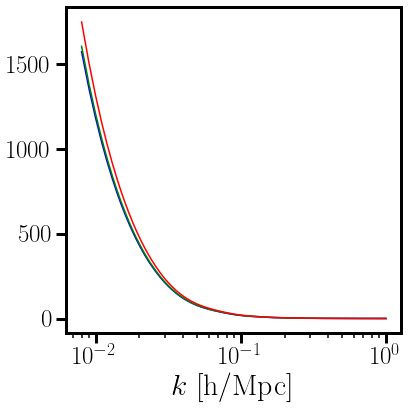

f_NL_375.txt


<Figure size 432x288 with 0 Axes>

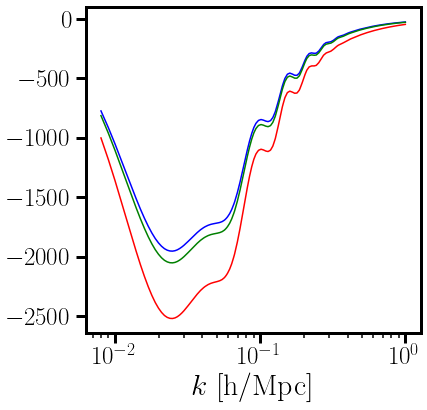

N_ur_325.txt


<Figure size 432x288 with 0 Axes>

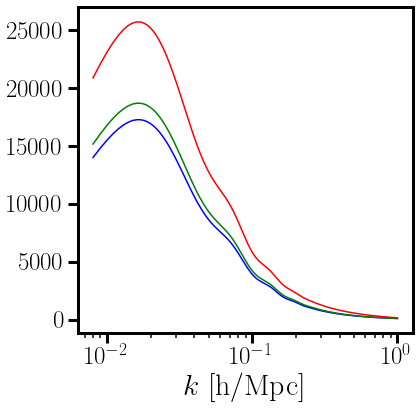

log(A_s)_225.txt


<Figure size 432x288 with 0 Axes>

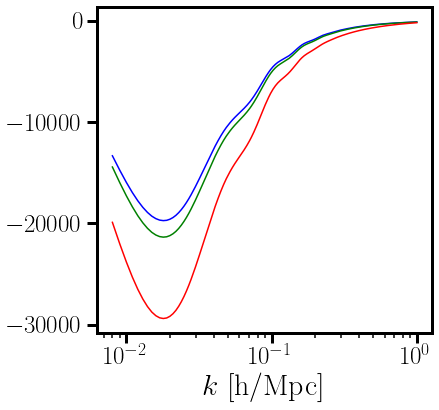

fEDE_2026_225.txt


<Figure size 432x288 with 0 Axes>

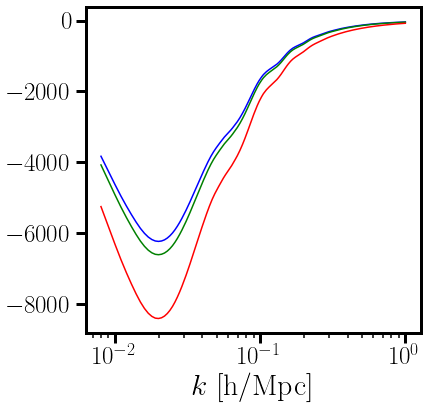

m_ncdm_325.txt


<Figure size 432x288 with 0 Axes>

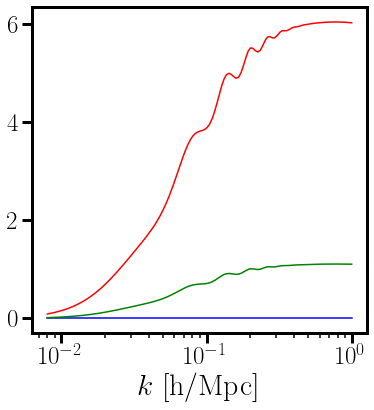

alpha2_225.txt


<Figure size 432x288 with 0 Axes>

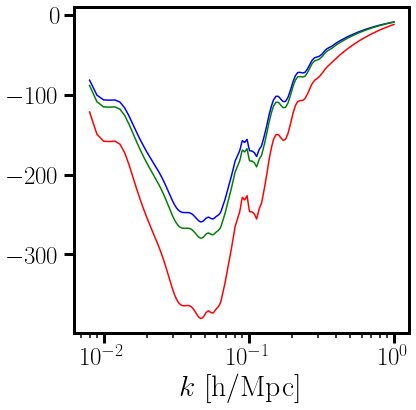

fEDE_6236_225.txt


<Figure size 432x288 with 0 Axes>

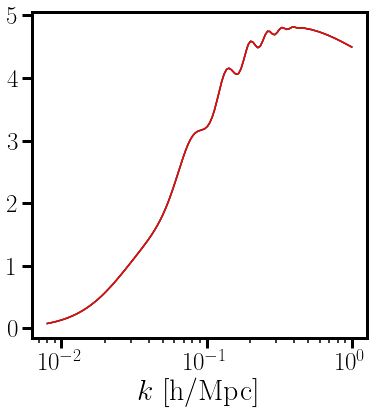

alpha0_425.txt


<Figure size 432x288 with 0 Axes>

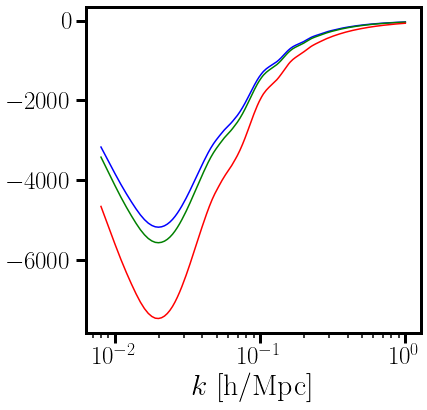

m_ncdm_275.txt


<Figure size 432x288 with 0 Axes>

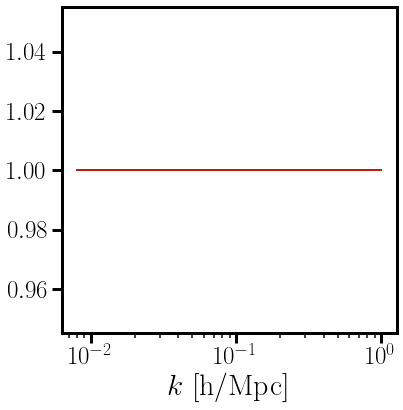

N_275.txt


<Figure size 432x288 with 0 Axes>

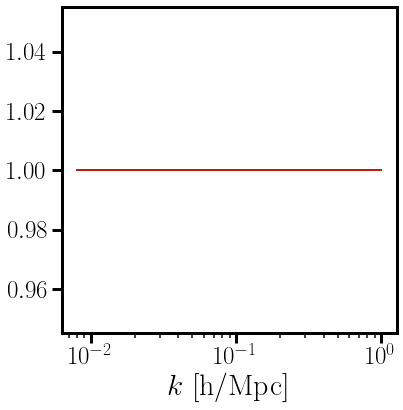

N_225.txt


<Figure size 432x288 with 0 Axes>

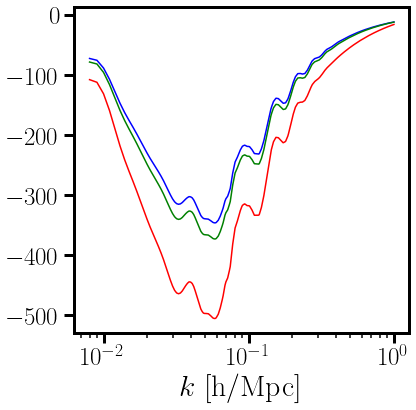

fEDE_5973_225.txt


<Figure size 432x288 with 0 Axes>

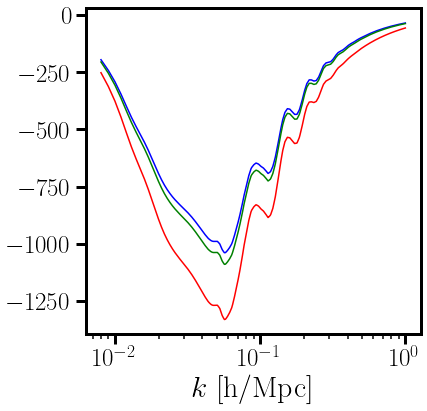

fEDE_5447_325.txt


<Figure size 432x288 with 0 Axes>

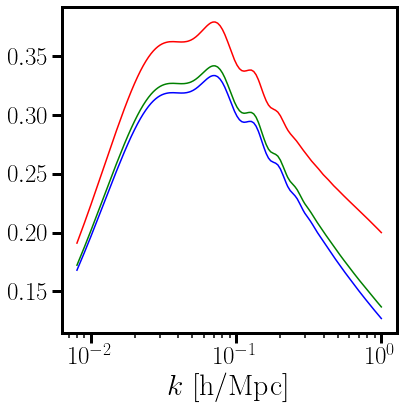

f_NL_eq_325.txt


<Figure size 432x288 with 0 Axes>

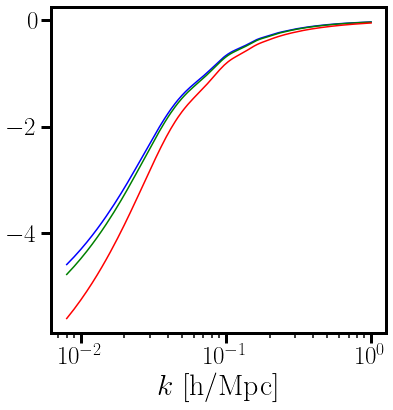

f_NL_orth_225.txt


<Figure size 432x288 with 0 Axes>

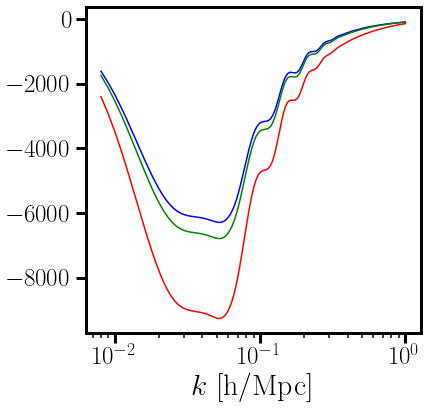

fEDE_3605_225.txt


<Figure size 432x288 with 0 Axes>

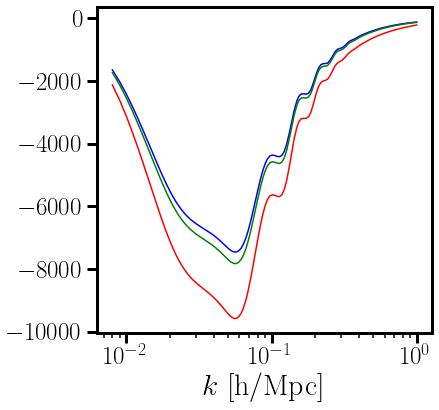

fEDE_3868_325.txt


<Figure size 432x288 with 0 Axes>

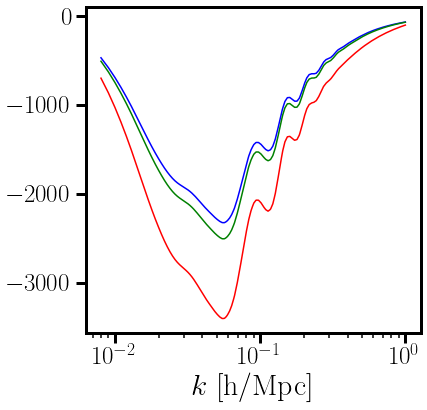

fEDE_4394_225.txt


<Figure size 432x288 with 0 Axes>

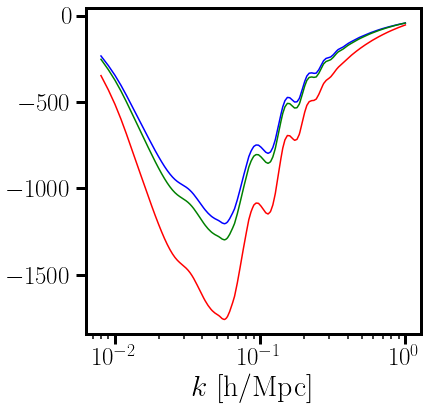

fEDE_4921_225.txt


<Figure size 432x288 with 0 Axes>

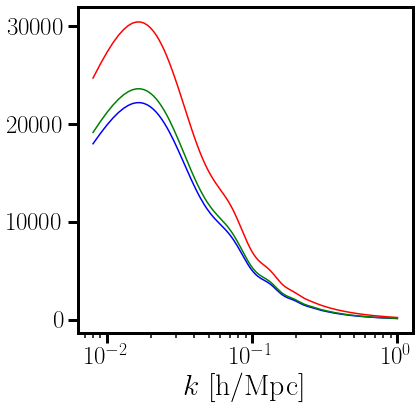

log(A_s)_275.txt


<Figure size 432x288 with 0 Axes>

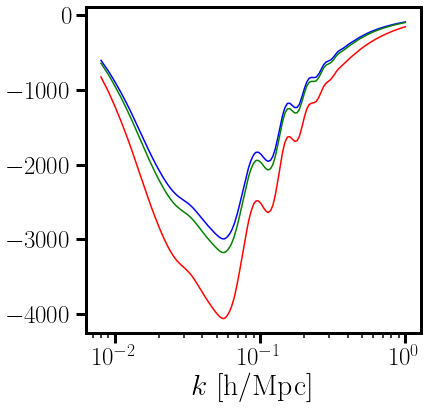

fEDE_4394_275.txt


<Figure size 432x288 with 0 Axes>

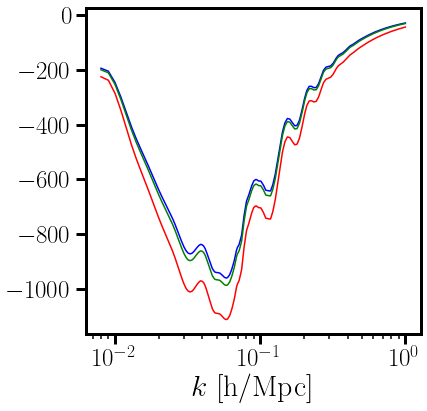

fEDE_5973_475.txt


<Figure size 432x288 with 0 Axes>

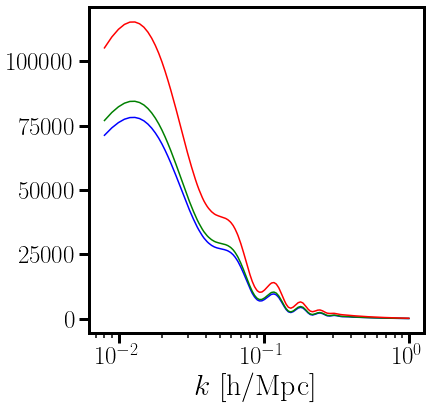

h_225.txt


<Figure size 432x288 with 0 Axes>

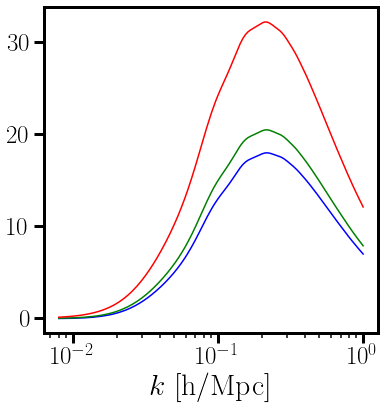

b2_475.txt


<Figure size 432x288 with 0 Axes>

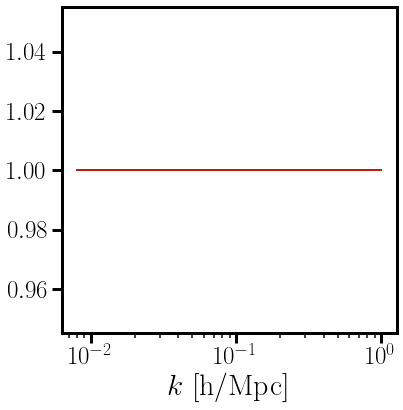

N_425.txt


<Figure size 432x288 with 0 Axes>

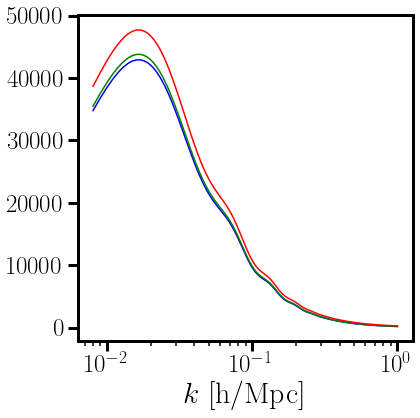

b_375.txt


<Figure size 432x288 with 0 Axes>

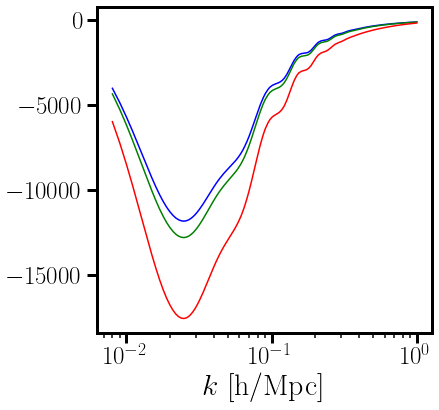

fEDE_3078_225.txt


<Figure size 432x288 with 0 Axes>

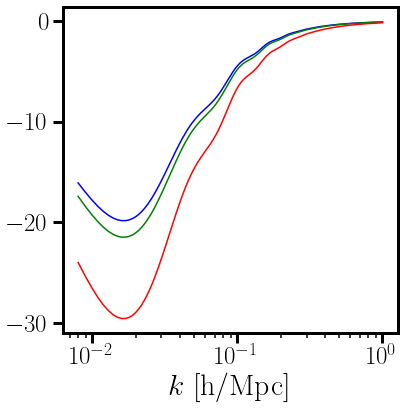

Da_225.txt


<Figure size 432x288 with 0 Axes>

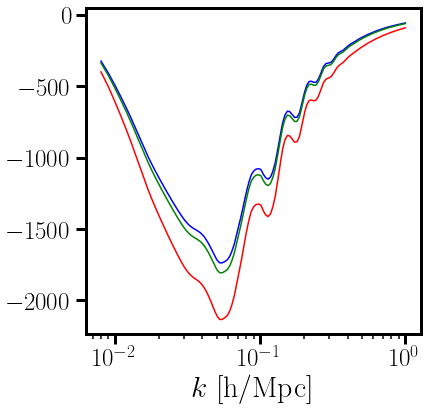

fEDE_5184_375.txt


<Figure size 432x288 with 0 Axes>

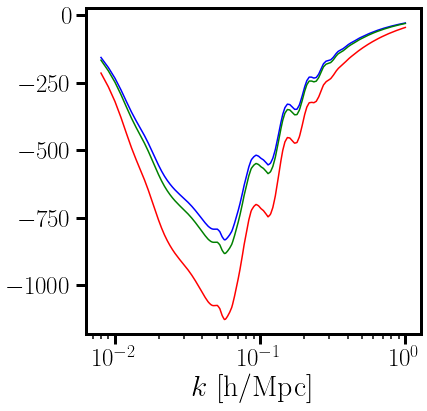

fEDE_5447_275.txt


<Figure size 432x288 with 0 Axes>

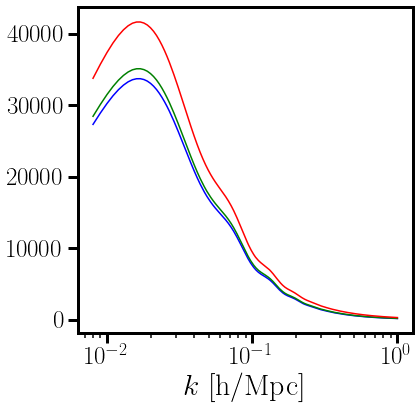

log(A_s)_375.txt


<Figure size 432x288 with 0 Axes>

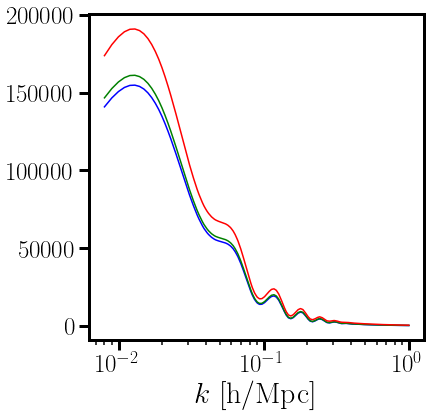

h_375.txt


<Figure size 432x288 with 0 Axes>

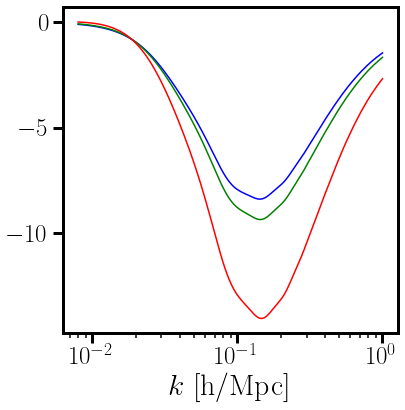

bs_375.txt


<Figure size 432x288 with 0 Axes>

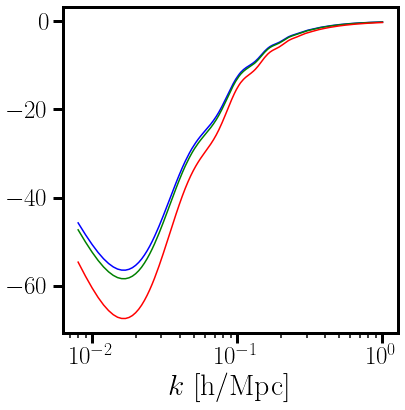

Da_425.txt


<Figure size 432x288 with 0 Axes>

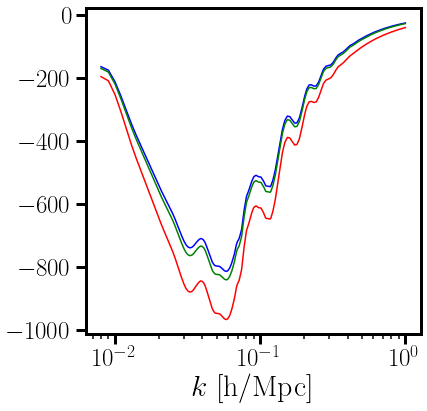

fEDE_5973_425.txt


<Figure size 432x288 with 0 Axes>

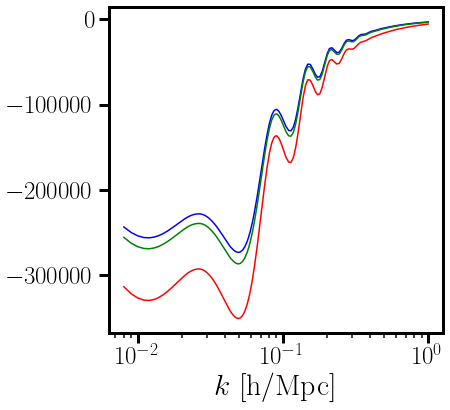

omega_b_325.txt


<Figure size 432x288 with 0 Axes>

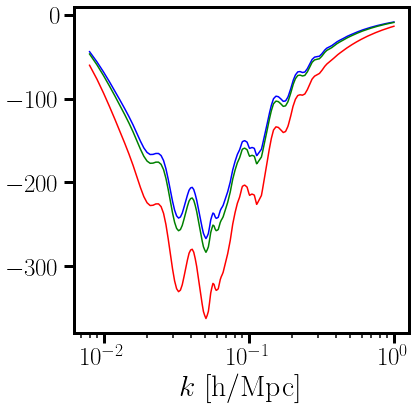

fEDE_6500_275.txt


<Figure size 432x288 with 0 Axes>

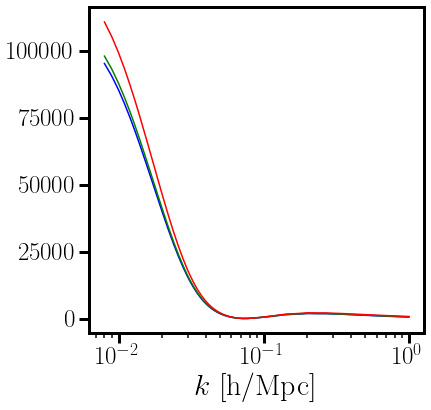

alpha_s_475.txt


<Figure size 432x288 with 0 Axes>

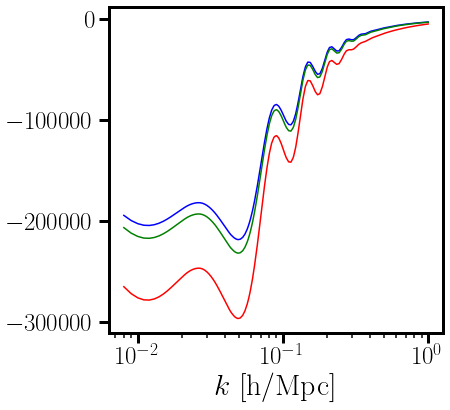

omega_b_275.txt


<Figure size 432x288 with 0 Axes>

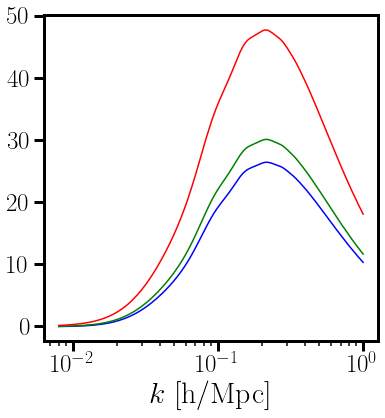

b2_375.txt


<Figure size 432x288 with 0 Axes>

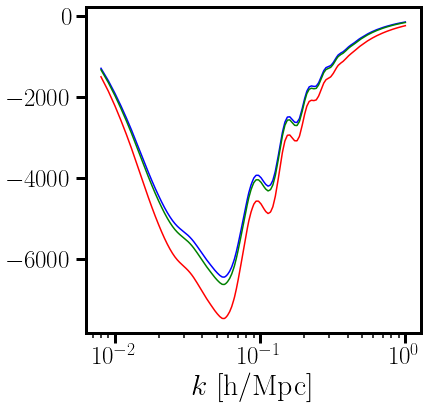

fEDE_4394_475.txt


<Figure size 432x288 with 0 Axes>

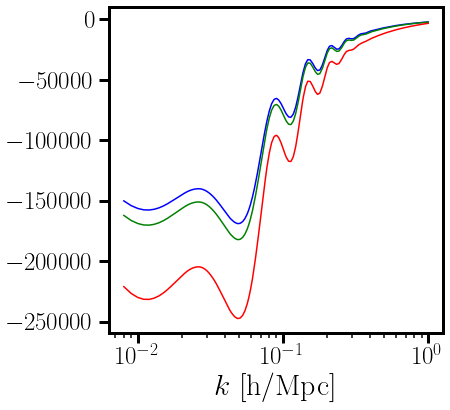

omega_b_225.txt


<Figure size 432x288 with 0 Axes>

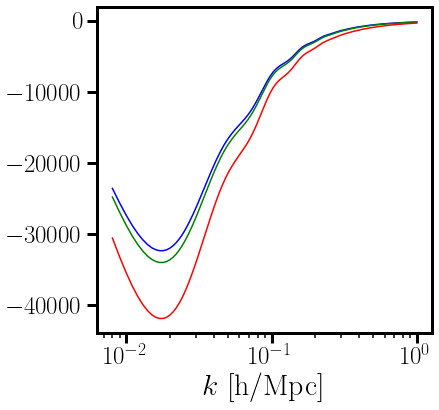

fEDE_1763_325.txt


<Figure size 432x288 with 0 Axes>

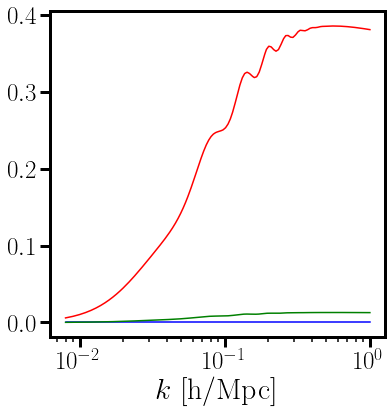

alpha4_275.txt


<Figure size 432x288 with 0 Axes>

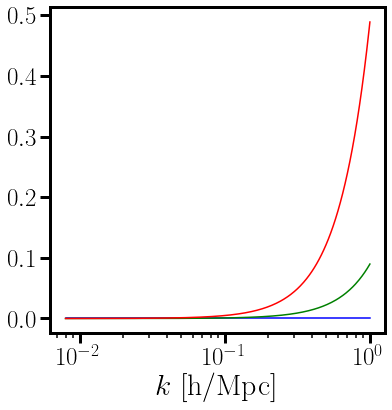

sn2_425.txt


<Figure size 432x288 with 0 Axes>

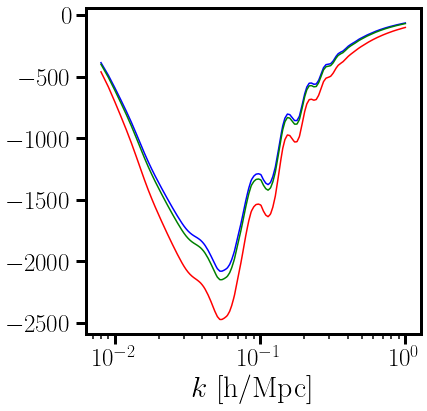

fEDE_5184_425.txt


<Figure size 432x288 with 0 Axes>

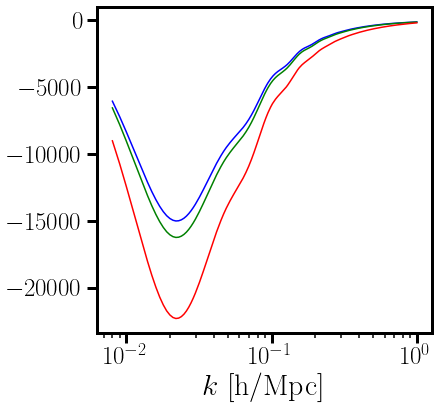

fEDE_2815_225.txt


<Figure size 432x288 with 0 Axes>

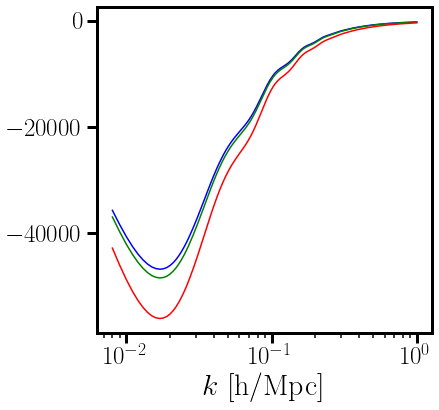

fEDE_1500_425.txt


<Figure size 432x288 with 0 Axes>

In [10]:
megaCast.check_derivatives()

Recalculate the derivatives that looked bad

In [8]:
#parameters = np.array(['N_ur','f_NL','omega_b','n_s','f_NL_eq','f_NL','fEDE','f_NL_eq','b2','Hz','A_lin'])
#z = np.array([2.25,3.25,4.75,2.75,4.75,4.25,3.75,2.25,2.75,2.25,2.25])
parameters = np.array(['m_ncdm'])
z = np.array([4.25])

In [9]:
megaCast.compute_derivatives(parameters=parameters, z=z)

Double check that this worked.

## Calculating the Fisher matrix

In [98]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs',\
                  'alpha0','alpha2','alpha4','sn2','N','f_NL_eq'])

In [99]:
F = megaCast.gen_fisher(basis)

## Loading SO priors

In [7]:
SO = np.zeros((15,15))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= megaParams['A_s']
tmp[:,5] *= megaParams['A_s']

mapping = {0:0,1:5,2:4,3:6,4:3,5:1}
for i in range(6):
    for j in range(6):
        SO[i,j] = tmp[mapping[i],mapping[j]]

In [8]:
SO_no_nonlin = np.zeros((13,13))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= megaParams['A_s']
tmp[:,5] *= megaParams['A_s']

mapping = {0:0,1:5,2:4,3:6,4:3,5:1}
for i in range(6):
    for j in range(6):
        SO_no_nonlin[i,j] = tmp[mapping[i],mapping[j]]

# One-parameter extensions

In [9]:
def one_param_extension_constraint(n,zmax,param,include_SO=False):
   '''
   Function that returns the uncertainty of param for 
   a given number density and zmax, assuming zmin=2
   '''
   megaMapper_fake = experiment(zmin=2., zmax=zmax, nbins=int((zmax-2.)/0.5), fsky=0.5, \
                     sigma_z=0.0, LBG=True, custom_n=True, n=n)
   megaCast_fake = fisherForecast(experiment=megaMapper_fake,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                       khmax=1.,Nk=200,Nmu=200,velocileptors=True,name='MegaMapper')
   basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs',\
                  'alpha0','alpha2','alpha4','sn2','N',param])
   F = megaCast_fake.gen_fisher(basis)
   # to include SO, first save a nice looking array
   if include_SO: return np.sqrt(np.linalg.inv(F+SO)[-1,-1])
   return np.sqrt(np.linalg.inv(F)[-1,-1])

In [10]:
ns = np.array([0.001,0.005,0.01,0.05,0.1])
zmaxs = np.array([2.5,3.,3.5,4.,4.5,5.])
#zmaxs = np.array([3.5,4.,4.5,5.])

In [11]:
param = 'm_ncdm'

In [12]:
sigmas = np.zeros((len(ns),len(zmaxs)))
for i,n in enumerate(ns):
   for j,zmax in enumerate(zmaxs):
      print('n=',n,'zmax=',zmax)
      sigmas[i,j] = one_param_extension_constraint(n,zmax,param,include_SO=True)

n= 0.001 zmax= 2.5
n= 0.001 zmax= 3.0
n= 0.001 zmax= 3.5
n= 0.001 zmax= 4.0
n= 0.001 zmax= 4.5
n= 0.001 zmax= 5.0
n= 0.005 zmax= 2.5
n= 0.005 zmax= 3.0
n= 0.005 zmax= 3.5
n= 0.005 zmax= 4.0
n= 0.005 zmax= 4.5
n= 0.005 zmax= 5.0
n= 0.01 zmax= 2.5
n= 0.01 zmax= 3.0
n= 0.01 zmax= 3.5
n= 0.01 zmax= 4.0
n= 0.01 zmax= 4.5
n= 0.01 zmax= 5.0
n= 0.05 zmax= 2.5
n= 0.05 zmax= 3.0
n= 0.05 zmax= 3.5
n= 0.05 zmax= 4.0
n= 0.05 zmax= 4.5
n= 0.05 zmax= 5.0
Have not calculated derivative of b2


TypeError: ufunc 'add' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

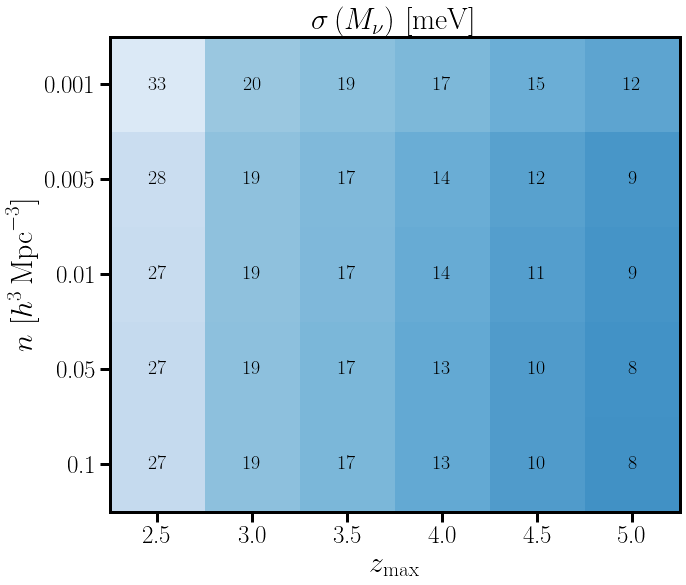

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sigmas*1000,cmap='Blues_r',vmin=-10,vmax=40)
ax.set_yticks(np.arange(len(ns)))
ax.set_xticks(np.arange(len(zmaxs)))
ax.set_yticklabels(ns.astype(str))
ax.set_xticklabels(zmaxs.astype(str))
for i in range(len(ns)):
    for j in range(len(zmaxs)):
        ax.text(j, i, str(int(sigmas[i, j]*1000)),ha="center", va="center", color="k",fontsize=20)
ax.set_xlabel(r'$z_\text{max}$')
ax.set_ylabel(r'$n\,\,[h^3\,{\rm Mpc}^{-3}]$')
ax.set_title(r'$\sigma\left(M_\nu\right)\,{\rm [meV]}$')
fig.tight_layout()
plt.savefig('figures/sigma_mnu_vs_n_and_zmax_with_SO.pdf')

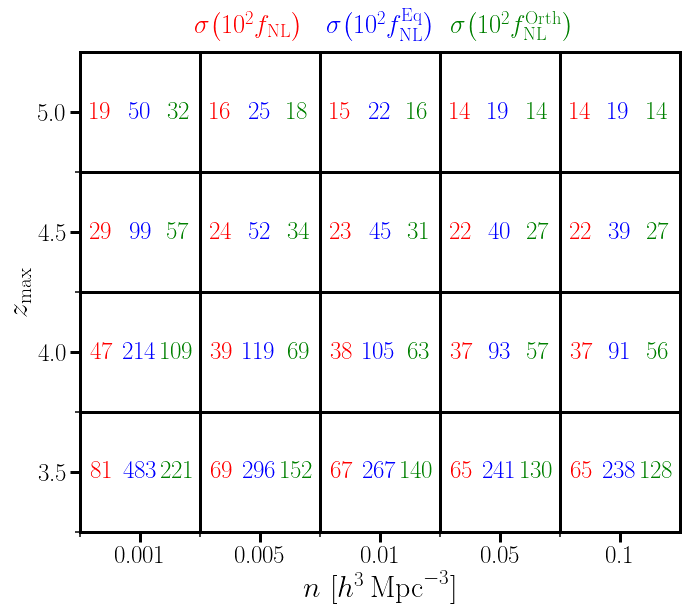

In [112]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(sigmas,cmap='Greys',vmin=5,vmax=100)
ax.set_xticks(np.arange(len(ns)))
ax.set_yticks(np.arange(len(zmaxs)))

ax.set_xticks(np.arange(len(ns))-.5, minor=True)
ax.set_yticks(np.arange(len(zmaxs))-.5, minor=True)

ax.set_xticklabels(ns.astype(str))
ax.set_yticklabels(zmaxs.astype(str))
for i in range(len(ns)):
    for j in range(len(zmaxs)):
        if j>1:
           ax.text(i-0.32, j, str(int(sigmas[i, j]*100)),ha="center", va="center", color='red',fontsize=25)
           ax.text(i, j, str(int(sigmas1[i, j]*100)),ha="center", va="center", color='blue',fontsize=25)
           ax.text(i+0.32, j, str(int(sigmas2[i, j]*100)),ha="center", va="center", color='green',fontsize=25)
ax.set_ylabel(r'$z_\text{max}$')
ax.set_xlabel(r'$n\,\,[h^3\,{\rm Mpc}^{-3}]$')
#ax.set_title(r'$\sigma\left(10^2f_\text{NL}\right),\sigma\left(10^2f^\text{Eq}_\text{NL}\right),\sigma\left(10^2f^\text{Orth}_\text{NL}\right)$')
ax.text(0.9, 5.6, r'$\sigma\big(10^2f_\text{NL}\big)$', ha="center", va="bottom", size='large',color="red")
ax.text(2., 5.6, r'$\sigma\big(10^2f^\text{Eq}_\text{NL}\big)$', ha="center", va="bottom", size='large',color="blue")
ax.text(3.1, 5.6, r'$\sigma\big(10^2f^\text{Orth}_\text{NL}\big)$', ha="center", va="bottom", size='large',color="green")
fig.tight_layout()
ax.grid(which='minor', color='k', linestyle='-', linewidth=3)
plt.ylim(1.5,5.5)
plt.xlim(-0.5,4.5)
plt.savefig('figures/sigma_fNL_vs_n_and_zmax_with_SO.pdf')

# looking at $z_\text{max}=4.5$ and $n=0.001$.

In [27]:
megaMapper_fake = experiment(zmin=2., zmax=4.5, nbins=5, fsky=0.5, \
                     sigma_z=0.0, LBG=True, custom_n=True, n=0.001)
megaCast_fake = fisherForecast(experiment=megaMapper_fake,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                       khmax=1.,Nk=200,Nmu=200,velocileptors=True,name='MegaMapper')
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','bs',\
                  'alpha0','alpha2','alpha4','sn2','N','m_ncdm'])

basis_no_nonlin = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b',\
                  'alpha0','alpha2','alpha4','sn2','N','m_ncdm'])

In [67]:
alphas = np.linspace(0.1,1.,30)

In [68]:
sigma_mnu = []
sigma_mnu_no_nonlin = []

for alpha in alphas:
   F = megaCast_fake.gen_fisher(basis,alpha=alpha)
   F_no_nonlin = megaCast_fake.gen_fisher(basis_no_nonlin,alpha=alpha)
   sigma_mnu.append(np.sqrt(np.linalg.inv(F+SO)[-1,-1]))
   sigma_mnu_no_nonlin.append(np.sqrt(np.linalg.inv(F_no_nonlin+SO_no_nonlin)[-1,-1]))

In [69]:
sigma_mnu = np.array(sigma_mnu)
sigma_mnu_no_nonlin = np.array(sigma_mnu_no_nonlin)

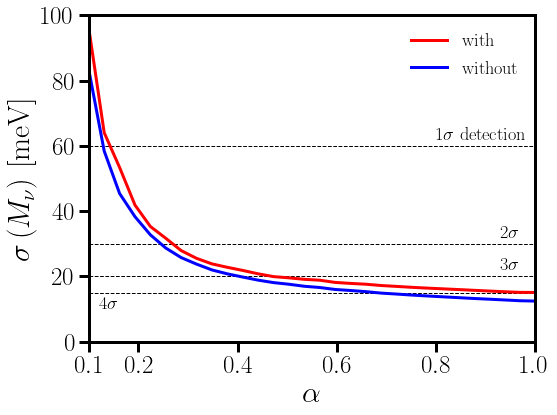

In [88]:
plt.figure(figsize=(8,6))

plt.axhline(60.,0.,1.,color='k',ls='--',lw=1)
plt.text(0.8,62,r'$1\sigma$ detection',fontsize='small')
plt.axhline(30.,0.,1.,color='k',ls='--',lw=1)
plt.text(0.93,32,r'$2\sigma$',fontsize='small')
plt.axhline(20.,0.,1.,color='k',ls='--',lw=1)
plt.text(0.93,22,r'$3\sigma$',fontsize='small')
plt.axhline(15.,0.,1.,color='k',ls='--',lw=1)
plt.text(0.12,10,r'$4\sigma$',fontsize='small')

plt.plot(alphas,sigma_mnu*1000.,color='red',lw=3,label='with')
plt.plot(alphas,sigma_mnu_no_nonlin*1000.,color='b',lw=3,label='without')

plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma\left(M_\nu\right)\,{\rm [meV]}$')
plt.xticks(ticks=[0.1,0.2,0.4,0.6,0.8,1.0])
plt.legend(loc=0,frameon=False,fontsize='small')
plt.xlim(0.1,1.)
plt.ylim(0,100)
plt.savefig('figures/sigma_mu_vs_alpha.pdf',bbox_inches='tight')

# Constraints of primordial features

In [5]:
megaCast.marg_params = np.array(['A_lin'])

In [6]:
omega_lins = np.logspace(np.log10(250),np.log10(300.),2)

In [15]:
for omega_lin in omega_lins:
   megaCast.omega_lin = omega_lin
   megaCast.compute_derivatives()

In function -  update_power_spectrum


/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:157: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:160: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon * self.yq**l
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:120: RuntimeWarning: overflow encountered in exp
  expon = np.exp(-0.5*ksq * (self.XYlin - self.sigma))
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:121: RuntimeWarning: overflow encountered in expm1
  exponm1 = np.expm1(-0.5*ksq * (self.XYlin - self.sigma))
/home/noah/Documents/Berkeley/fishlss/LPT/cleft_fftw.py:157: RuntimeWarning: invalid value encountered in multiply
  bias_integrands = bias_integrands * expon
/home/noah/Documents/Berkeley/fishlss/LPT/velocity_moments_fftw.py:188: RuntimeWarning: overflow encountered in multiply
  bias_integrands = bias_integrands * expon * self.yq**l
/home/noah/Docum

In function -  update_power_spectrum
In function -  update_power_spectrum
In function -  update_power_spectrum
In function -  update_power_spectrum
In function -  update_power_spectrum


KeyboardInterrupt: 

# EDE constraints

In [5]:
megaCast.marg_params = np.array(['fEDE'])

In [62]:
log10z_cs = np.linspace(1.5,6.5,20)

In [7]:
for log10z_c in log10z_cs:
   megaCast.log10z_c = log10z_c
   megaCast.compute_derivatives()

In [5]:
SO = np.zeros((10,10))

# in H_0, tau_reio, omega_nu, omega_b, omega_cdm, A_s, n_s basis
tmp = np.genfromtxt('input/LAT_baseline_fsky04_fish_mat.dat')
# in h, tau_reio, omega_nu, omega_b, omega_cdm, log(A_s), n_s basis
tmp[0,:] *= 100.
tmp[:,0] *= 100.
tmp[5,:] *= megaParams['A_s']
tmp[:,5] *= megaParams['A_s']

mapping = {0:0,1:5,2:4,3:6,4:3,5:1}
for i in range(6):
    for j in range(6):
        SO[i,j] = tmp[mapping[i],mapping[j]]

In [156]:
basis = np.array(['h','log(A_s)','omega_cdm','n_s','omega_b','tau_reio','b','b2','N','fEDE'])
def sigmaFede(forecast,log10z_c):
   forecast.name = 'MegaMapper'
   F = forecast.gen_fisher(basis,log10z_c=log10z_c)
   Finv = np.linalg.inv(F+SO) # remove prior
   return np.sqrt(Finv[-1,-1])

In [27]:
NGH1 = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True, custom_n=True, n=0.001)
NGH1_f = fisherForecast(experiment=NGH1,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                          khmax=1.,Nk=200,Nmu=200,velocileptors=True)
NGH2 = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True, custom_n=True, n=0.01)
NGH2_f = fisherForecast(experiment=NGH2,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                          khmax=1.,Nk=200,Nmu=200,velocileptors=True)
NGH3 = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True, custom_n=True, n=0.1)
NGH3_f = fisherForecast(experiment=NGH3,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                          khmax=1.,Nk=200,Nmu=200,velocileptors=True)

In [53]:
cv = experiment(zmin=2., zmax=5., nbins=6, fsky=0.5, sigma_z=0.0, LBG=True, custom_n=True, n=10000.)
cv_f = fisherForecast(experiment=cv,cosmo=megaCosmo,params=megaParams,khmin=5.e-4,\
                          khmax=1.,Nk=200,Nmu=200,velocileptors=True)

In [157]:
constraints1 = 2.*np.array([sigmaFede(NGH1_f,log10z_c) for log10z_c in log10z_cs])

In [29]:
constraints2 = 2.*np.array([sigmaFede(NGH2_f,log10z_c) for log10z_c in log10z_cs])

In [35]:
constraints3 = 2.*np.array([sigmaFede(NGH3_f,log10z_c) for log10z_c in log10z_cs])

In [55]:
constraintsCV = 2.*np.array([sigmaFede(cv_f,log10z_c) for log10z_c in log10z_cs])

In [57]:
constraints1 = np.array([0.01709276 ,0.01729773 ,0.01775759 ,0.01791134 ,0.01804023 ,0.01759557 ,0.01262878 ,0.01115024 ,0.00942947 ,0.00822529 ,0.00831125 ,0.01025012,0.01509863 ,0.02326655 ,0.03269584 ,0.0442507 , 0.05958529 ,0.08059513 ,0.10818926, 0.14689707])

In [58]:
constraints2 = np.array([0.01622974 ,0.01661401, 0.01756597, 0.01773349, 0.01779939 ,0.01697046 ,0.01123471 ,0.00996632 ,0.00822269, 0.00681176 ,0.00629247 ,0.00744815, 0.01273545 ,0.02048793 ,0.03082804 ,0.04255545 ,0.05724191 ,0.07735707 ,0.10336245 ,0.14028016])

In [59]:
constraints3 = np.array([0.01601282 ,0.01642195 ,0.01753666 ,0.0177099  ,0.01776643 ,0.01687146 ,0.01102017 ,0.00977699 ,0.00804309 ,0.00660251 ,0.0059875  ,0.00686837 ,0.01222964 ,0.01973458 ,0.03038931 ,0.0423279  ,0.05693107 ,0.07690301 ,0.1026715  ,0.13928625])

In [60]:
constraintsCV = np.array([0.01598395 ,0.01639581 ,0.01753305 ,0.01770706 ,0.01776247 ,0.01685946 ,0.01099437 ,0.00975394 ,0.00802154 ,0.00657749 ,0.00595115 ,0.00679686 ,0.0121651  ,0.01963321 ,0.03032956 ,0.04230053 ,0.05689399 ,0.07684804 ,0.10258732 ,0.13916404])

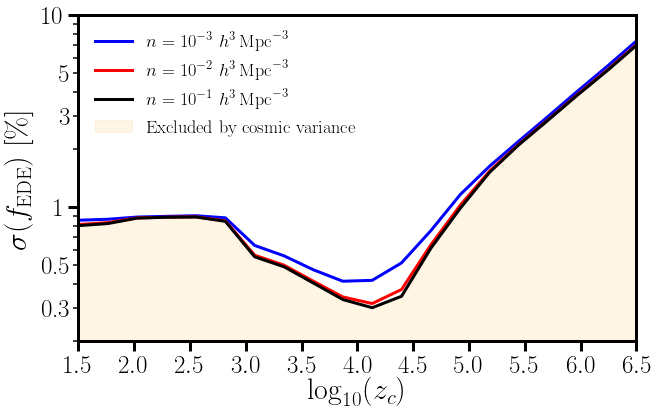

In [127]:
fig, ax = plt.subplots(figsize=(10,6))
ax.semilogy(log10z_cs,100.*constraints1/2.,label=r'$n=10^{-3}$ $h^3\,{\rm Mpc}^{-3}$',lw=3,c='b')
ax.semilogy(log10z_cs,100.*constraints2/2.,label=r'$n=10^{-2}$ $h^3\,{\rm Mpc}^{-3}$',lw=3,c='r')
ax.plot(log10z_cs,100.*constraints3/2.,label=r'$n=10^{-1}$ $h^3\,{\rm Mpc}^{-3}$',lw=3,c='k')
ax.fill_between(log10z_cs,np.ones(len(log10z_cs))*(0.001),100.*constraintsCV/2.,color='orange',alpha=0.1,label='Excluded by cosmic variance')
ax.set_xlabel(r'$\log_{10}(z_c)$')
ax.set_ylabel(r'$\sigma(f_\text{EDE})$ [\%]')
ax.legend(loc='upper left',fontsize='small',frameon=False)
plt.xticks(ticks=[1.5,2.,2.5,3.,3.5,4.,4.5,5.,5.5,6.,6.5])
plt.xlim(1.5,6.5)
plt.ylim(0.2,10.)
ax.set_yticks([1,10])
ax.set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],minor=True)
ax.set_yticklabels(['1','10'])
ax.set_yticklabels(['','0.3','','0.5','','','','','','3','','5'],minor=True)
plt.savefig('figures/fEDE_constraints.pdf',bbox_inches='tight')

In [33]:
print(constraints1)

[0.01709276 0.01729773 0.01775759 0.01791134 0.01804023 0.01759557
 0.01262878 0.01115024 0.00942947 0.00822529 0.00831125 0.01025012
 0.01509863 0.02326655 0.03269584 0.0442507  0.05958529 0.08059513
 0.10818926 0.14689707]


In [34]:
print(constraints2)

[0.01622974 0.01661401 0.01756597 0.01773349 0.01779939 0.01697046
 0.01123471 0.00996632 0.00822269 0.00681176 0.00629247 0.00744815
 0.01273545 0.02048793 0.03082804 0.04255545 0.05724191 0.07735707
 0.10336245 0.14028016]


In [39]:
print(constraints3)

[0.01601282 0.01642195 0.01753666 0.0177099  0.01776643 0.01687146
 0.01102017 0.00977699 0.00804309 0.00660251 0.0059875  0.00686837
 0.01222964 0.01973458 0.03038931 0.0423279  0.05693107 0.07690301
 0.1026715  0.13928625]


In [57]:
print(constraintsCV)

[0.01598395 0.01639581 0.01753305 0.01770706 0.01776247 0.01685946
 0.01099437 0.00975394 0.00802154 0.00657749 0.00595115 0.00679686
 0.0121651  0.01963321 0.03032956 0.04230053 0.05689399 0.07684804
 0.10258732 0.13916404]
